regression analysis Pib-Percapita, Populacao, taxa de analfabetismo, quantidade de pessoas no bolsa familia, UF -2021
votos - 2022

In [72]:
import pandas as pd

# criando o df

In [72]:
bolsa_familia = pd.read_csv('bolsa_fam.csv')
analfabetismo = pd.read_csv('analfabetismo.csv')

In [59]:
pib_municipios = pd.read_excel('PIB dos Municípios - base de dados 2010-2021.xlsx')
pib_2 = pd.read_excel('PIB dos Municípios - base de dados 2002-2009.xls')

In [60]:
pib_municipios = pd.concat([pib_municipios, pib_2])

In [62]:
percentage_votos_centrao = pd.read_csv('centrao_2022.csv')
pib_2021 = pib_municipios[pib_municipios['Ano']==2021]

In [63]:
populacao = pib_2021['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)'] / pib_2021['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']* 1000


In [64]:

regress_data = pib_2021[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data = regress_data.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data.sort_index()
regress_data['populacao'] = populacao

In [65]:
ibg_ana = regress_data[['ibge', 'municipio', 'uf']].sort_values(['municipio', 'uf'])

In [66]:
analfabetismo.sort_values(['Municipio', "UF"])
analfabetismo.set_index(['Municipio', 'UF'])


Total
Municipio      UF       
Acrelândia     AC  88.35
Assis Brasil   AC  85.30
Brasiléia      AC  89.01
Bujari         AC  81.26
Capixaba       AC  84.27
...                  ...
Tocantinópolis TO  90.04
Tupirama       TO  87.97
Tupiratins     TO  84.89
Wanderlândia   TO  86.39
Xambioá        TO  86.38

[5570 rows x 1 columns]

In [67]:
analfabetismo = analfabetismo.merge(ibg_ana, left_on=['Municipio', 'UF'], right_on=['municipio', 'uf'])

In [68]:
analfabetismo = analfabetismo[['ibge', 'Total']]

In [69]:
regress_data = regress_data.merge(analfabetismo, left_on='ibge', right_on='ibge')
regress_data = regress_data.rename(columns={'Total':'taxa_analfabetismo'})
regress_data['taxa_analfabetismo'] = 100 - regress_data['taxa_analfabetismo']

In [73]:
bolsa_familia

Sigla   Código       Município  \
0       AC  1200013      Acrelândia   
1       AC  1200054    Assis Brasil   
2       AC  1200104       Brasiléia   
3       AC  1200138          Bujari   
4       AC  1200179        Capixaba   
...    ...      ...             ...   
5591    TO  1721208  Tocantinópolis   
5592    TO  1721257        Tupirama   
5593    TO  1721307      Tupiratins   
5594    TO  1722081    Wanderlândia   
5595    TO  1722107         Xambioá   

      Programa Bolsa Família (PBF) - número de benefícios em dezembro (2021)  \
0                                                1730.0                        
1                                                1364.0                        
2                                                3208.0                        
3                                                1323.0                        
4                                                1325.0                        
...                                                 ...                        
5591                                             2293.0                        
5592                                              155.0                        
5593                                              240.0                        
5594                                             1361.0                        
5595                                             1290.0                        

      Programa Bolsa Família (PBF) - valor total dos benefícios em dezembro (2021)  \
0                                               375.211                              
1                                               491.023                              
2                                               773.171                              
3                                               323.414                              
4                                               326.419                              
...                                                 ...                              
5591                                            657.274                              
5592                                             40.659                              
5593                                             57.330                              
5594                                            303.254                              
5595                                            267.740                              

      Unnamed: 5  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
5591         NaN  
5592         NaN  
5593         NaN  
5594         NaN  
5595         NaN  

[5596 rows x 6 columns]

In [70]:
bolsa_familia = bolsa_familia.pivot_table(index='ibge', values='Programa Bolsa Família (PBF) - número de benefícios em dezembro (2021)', aggfunc='sum')
bolsa_familia['ibge'] = bolsa_familia.index.astype(int)

KeyError: 'qtd_familias_beneficiarias_bolsa_familia'

In [91]:
regress_data['ibge'] = regress_data['ibge'].astype(int)
regress_data.dtypes


regiao                 object
ibge                    int32
municipio              object
pib_per_capita        float64
uf                     object
populacao             float64
taxa_analfabetismo    float64
dtype: object

In [94]:
unique_cds = votos_centrao.drop_duplicates('CD_MUNICIPIO')[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF']]
unique_cds

CD_MUNICIPIO               NM_MUNICIPIO SG_UF
0              1511          PLÁCIDO DE CASTRO    AC
1              1090                MÂNCIO LIMA    AC
2              1031        SANTA ROSA DO PURUS    AC
3              1120                 ACRELÂNDIA    AC
4              1490                     XAPURI    AC
...             ...                        ...   ...
83271         73083                PALMEIRANTE    TO
83274         92606  SANTA TEREZA DO TOCANTINS    TO
83275         73601                 LAVANDEIRA    TO
83287         73105     SÃO FÉLIX DO TOCANTINS    TO
83288         96830                     FÁTIMA    TO

[5570 rows x 3 columns]

In [95]:
percentage_votos_centrao = pd.DataFrame(percentage_votos_centrao)
percentage_votos_centrao = percentage_votos_centrao.rename(columns={0:'percentage_votos_centrao'})
percentage_votos_centrao = percentage_votos_centrao.merge(unique_cds, left_index=True, right_on='CD_MUNICIPIO')

In [97]:
import unidecode
ibg_ana['municipio'] = ibg_ana['municipio'].str.upper()
ibg_ana['municpio'] = ibg_ana['municipio'].apply(unidecode.unidecode)

In [155]:
ibg_ana

ibge            municipio  uf
66578  5200050      ABADIA DE GOIÁS  GO
63499  3100104  ABADIA DOS DOURADOS  MG
66579  5200100            ABADIÂNIA  GO
61406  1500107           ABAETETUBA  PA
63500  3100203               ABAETÉ  MG
...        ...                  ...  ..
65889  4301552                ÁUREA  RS
65180  4101150               ÂNGULO  PR
63087  2900504        ÉRICO CARDOSO  BA
61487  1505106               ÓBIDOS  PA
64903  3533809                 ÓLEO  SP

[5570 rows x 3 columns]

In [98]:
percentage_votos_centrao = percentage_votos_centrao.merge(ibg_ana, left_on=['NM_MUNICIPIO', 'SG_UF'], right_on=['municipio', 'uf'], how='right')

In [99]:
percentage_votos_centrao.isna().sum()

percentage_votos_centrao    66
CD_MUNICIPIO                66
NM_MUNICIPIO                66
SG_UF                       66
ibge                         0
municipio                    0
uf                           0
dtype: int64

In [100]:
percentage_votos_centrao = percentage_votos_centrao[['percentage_votos_centrao', 'ibge']]

In [102]:
regress_data = regress_data.merge(percentage_votos_centrao, on='ibge')

In [103]:
regress_data_2020  = regress_data

regiao     ibge              municipio  pib_per_capita  uf  \
0            Norte  1100015  Alta Floresta D'Oeste        32619.88  RO   
1            Norte  1100023              Ariquemes        28878.27  RO   
2            Norte  1100031                 Cabixi        47051.83  RO   
3            Norte  1100049                 Cacoal        32313.26  RO   
4            Norte  1100056             Cerejeiras        46185.81  RO   
...            ...      ...                    ...             ...  ..   
5564  Centro-oeste  5222005             Vianópolis        60900.61  GO   
5565  Centro-oeste  5222054         Vicentinópolis        53340.72  GO   
5566  Centro-oeste  5222203               Vila Boa        27886.97  GO   
5567  Centro-oeste  5222302          Vila Propício        51845.31  GO   
5568  Centro-oeste  5300108               Brasília        92732.27  DF   

         populacao  taxa_analfabetismo  percentage_votos_centrao  
0     2.251600e+04                8.41                       NaN  
1     1.111480e+05                5.92                  0.746897  
2     5.067000e+03               10.18                  0.368494  
3     8.641600e+04                6.29                  0.125420  
4     1.608800e+04                7.85                  0.259368  
...            ...                 ...                       ...  
5564  1.408800e+04                6.55                  0.719274  
5565  9.002000e+03                9.13                  0.591141  
5566  6.451000e+03               12.83                  0.263485  
5567  5.941000e+03               14.32                  0.585609  
5568  3.094325e+06                2.77                  0.371452  

[5569 rows x 8 columns]

In [104]:
pd.get_dummies(regress_data['uf'], dtype=int)

AC  AL  AM  AP  BA  CE  DF  ES  GO  MA  ...  PR  RJ  RN  RO  RR  RS  SC  \
0      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
1      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
2      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
3      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
4      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
5564   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
5565   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
5566   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
5567   0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   
5568   0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   0   0   

      SE  SP  TO  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   0   0  
4      0   0   0  
...   ..  ..  ..  
5564   0   0   0  
5565   0   0   0  
5566   0   0   0  
5567   0   0   0  
5568   0   0   0  

[5569 rows x 27 columns]

In [107]:
regress_analy = pd.concat([regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']], pd.get_dummies(regress_data['uf'], dtype=int)], axis=1)

In [108]:
regress_analy

pib_per_capita  taxa_analfabetismo  percentage_votos_centrao  \
0           32619.88                8.41                       NaN   
1           28878.27                5.92                  0.746897   
2           47051.83               10.18                  0.368494   
3           32313.26                6.29                  0.125420   
4           46185.81                7.85                  0.259368   
...              ...                 ...                       ...   
5564        60900.61                6.55                  0.719274   
5565        53340.72                9.13                  0.591141   
5566        27886.97               12.83                  0.263485   
5567        51845.31               14.32                  0.585609   
5568        92732.27                2.77                  0.371452   

         populacao  AC  AL  AM  AP  BA  CE  ...  PR  RJ  RN  RO  RR  RS  SC  \
0     2.251600e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
1     1.111480e+05   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
2     5.067000e+03   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
3     8.641600e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
4     1.608800e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
...            ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
5564  1.408800e+04   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5565  9.002000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5566  6.451000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5567  5.941000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5568  3.094325e+06   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      SE  SP  TO  
0      0   0   0  
1      0   0   0  
2      0   0   0  
3      0   0   0  
4      0   0   0  
...   ..  ..  ..  
5564   0   0   0  
5565   0   0   0  
5566   0   0   0  
5567   0   0   0  
5568   0   0   0  

[5569 rows x 31 columns]

In [183]:
centrao_votos_2002 = pd.read_csv('..\\Eleicoes\\indice_centrao_2002.csv', usecols=[1,2,3])
centrao_votos_2006 = pd.read_csv('..\\Eleicoes\\indice_centrao_2006.csv', usecols=[1,2,3])
centrao_votos_2010 = pd.read_csv('..\\Eleicoes\\indice_centrao_2010.csv', usecols=[1,2,3])
centrao_votos_2014 = pd.read_csv('..\\Eleicoes\\indice_centrao_2014.csv', usecols=[1,2,3])
centrao_votos_2018 = pd.read_csv('..\\Eleicoes\\indice_centrao_2018.csv', usecols=[1,2,3])

In [145]:
taxa_analfa_2002 = pd.read_csv('..\\taxa de analfabetismo\\2000\\analfa_2000.csv')
taxa_analfa_2010 = pd.read_csv('..\\taxa de analfabetismo\\2010\\analfa_2010.csv') 

In [151]:
pib_2002 = pib_municipios[pib_municipios['Ano']==2002]
pib_2006 = pib_municipios[pib_municipios['Ano']==2006]
pib_2010 = pib_municipios[pib_municipios['Ano']==2010]
pib_2014 = pib_municipios[pib_municipios['Ano']==2014]
pib_2018 = pib_municipios[pib_municipios['Ano']==2018]

In [252]:
regress_data_2002 = pib_2002[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data_2002 = regress_data_2002.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data_2002['municipio'] = regress_data_2002['municipio'].apply(unidecode.unidecode)
regress_data_2002['municipio'] = regress_data_2002['municipio'].str.upper()
regress_data_2002 = centrao_votos_2002.merge(regress_data_2002, left_on=['nm_municipio', 'sg_uf'], right_on=['municipio', 'uf'], how='right')
regress_data_2002.drop(columns=['nm_municipio', 'sg_uf'], inplace=True)

In [230]:
regress_data_2002

regiao     ibge              municipio  pib_per_capita  uf
0            Norte  1100015  ALTA FLORESTA D'OESTE         4047.83  RO
1            Norte  1100023              ARIQUEMES         5667.37  RO
2            Norte  1100031                 CABIXI         4246.99  RO
3            Norte  1100049                 CACOAL         6353.27  RO
4            Norte  1100056             CEREJEIRAS         4442.47  RO
...            ...      ...                    ...             ...  ..
5555  Centro-oeste  5222005             VIANOPOLIS         7243.69  GO
5556  Centro-oeste  5222054         VICENTINOPOLIS        10636.37  GO
5557  Centro-oeste  5222203               VILA BOA         4047.04  GO
5558  Centro-oeste  5222302          VILA PROPICIO         9820.04  GO
5559  Centro-oeste  5300108               BRASILIA        24721.18  DF

[5560 rows x 5 columns]

In [231]:
taxa_analfa_2002

Município Taxa de analfabetismo    ibge
0     ALTA FLORESTA D'OESTE                  14,8  110001
1                 ARIQUEMES                  11,1  110002
2                    CABIXI                  16,8  110003
3                    CACOAL                  11,5  110004
4                CEREJEIRAS                  12,4  110005
...                     ...                   ...     ...
5502             VIANOPOLIS                  12,3  522200
5503         VICENTINOPOLIS                  16,5  522205
5504               VILA BOA                  26,1  522220
5505          VILA PROPICIO                  26,8  522230
5506               BRASILIA                   5,4  530010

[5507 rows x 3 columns]

In [253]:
regress_data_2002 = regress_data_2002.merge(taxa_analfa_2002, left_on='municipio', right_on='Município', left_index=False, right_index=False)

In [254]:
regress_data_2002

0        regiao   ibge_x              municipio  pib_per_capita  \
0          NaN         Norte  1100015  ALTA FLORESTA D'OESTE         4047.83   
1     0.058461         Norte  1100023              ARIQUEMES         5667.37   
2     0.037951         Norte  1100031                 CABIXI         4246.99   
3     0.511934         Norte  1100049                 CACOAL         6353.27   
4     0.043358         Norte  1100056             CEREJEIRAS         4442.47   
...        ...           ...      ...                    ...             ...   
6149  0.402030  Centro-oeste  5222005             VIANOPOLIS         7243.69   
6150  0.038159  Centro-oeste  5222054         VICENTINOPOLIS        10636.37   
6151  0.007164  Centro-oeste  5222203               VILA BOA         4047.04   
6152  0.257369  Centro-oeste  5222302          VILA PROPICIO         9820.04   
6153  0.180728  Centro-oeste  5300108               BRASILIA        24721.18   

      uf              Município Taxa de analfabetismo  ibge_y  
0     RO  ALTA FLORESTA D'OESTE                  14,8  110001  
1     RO              ARIQUEMES                  11,1  110002  
2     RO                 CABIXI                  16,8  110003  
3     RO                 CACOAL                  11,5  110004  
4     RO             CEREJEIRAS                  12,4  110005  
...   ..                    ...                   ...     ...  
6149  GO             VIANOPOLIS                  12,3  522200  
6150  GO         VICENTINOPOLIS                  16,5  522205  
6151  GO               VILA BOA                  26,1  522220  
6152  GO          VILA PROPICIO                  26,8  522230  
6153  DF               BRASILIA                   5,4  530010  

[6154 rows x 9 columns]

---------------------------------------------------------------------------------------------------

In [101]:
regress2022_dados = pd.read_csv("regress_dados_atualizados.csv")
votos_centrao = pd.read_csv("indice_centrao_2022.csv")
regress2022_dados['municipio'] = regress2022_dados['municipio'].str.upper()
regress2022_dados = pd.merge(regress2022_dados, votos_centrao[['nm_municipio', '0']], left_on='municipio', right_on='nm_municipio', how='left')
regress2022_dados['percentage_votos_centrao'] = regress2022_dados['0']
regress2022_dados.drop(columns=['0', 'nm_municipio'], inplace=True)

In [105]:
regress2022_dados.drop(columns='...1', inplace=True)

In [106]:
regress2022_dados.describe()

ibge  pib_per_capita      Impostos     populacao  \
count  5.470000e+03     5470.000000  5.470000e+03  5.470000e+03   
mean   3.253843e+06    33888.332044  2.310860e+05  3.817548e+04   
std    9.828674e+05    42118.925763  2.690728e+06  2.224764e+05   
min    1.100023e+06     5407.660000  4.341770e+02  7.710001e+02   
25%    2.512334e+06    12788.407500  5.216024e+03  5.515250e+03   
50%    3.146058e+06    23347.140000  1.513141e+04  1.187500e+04   
75%    4.119140e+06    40858.417500  5.729335e+04  2.601875e+04   
max    5.222302e+06   920833.970000  1.681840e+08  1.239637e+07   

       taxa_analfabetismo  percentage_votos_centrao  \
count         5470.000000               5470.000000   
mean             0.118044                  0.428197   
std              0.075611                  0.244196   
min              0.009000                  0.000000   
25%              0.055600                  0.233499   
50%              0.093800                  0.418286   
75%              0.179875                  0.612925   
max              0.368100                  0.996596   

       Administração, defesa, educação e saúde públicas e seguridade social  \
count                                        5470.000000                      
mean                                            0.431993                      
std                                             0.495399                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             1.000000                      
max                                             1.000000                      

       Agricultura, inclusive apoio à agricultura e a pós colheita  \
count                                         5470.00000             
mean                                             0.18245             
std                                              0.38625             
min                                              0.00000             
25%                                              0.00000             
50%                                              0.00000             
75%                                              0.00000             
max                                              1.00000             

       Comércio e reparação de veículos automotores e motocicletas  \
count                                        5470.000000             
mean                                            0.010238             
std                                             0.100671             
min                                             0.000000             
25%                                             0.000000             
50%                                             0.000000             
75%                                             0.000000             
max                                             1.000000             

        Construção  ...  \
count  5470.000000  ...   
mean      0.000914  ...   
std       0.030223  ...   
min       0.000000  ...   
25%       0.000000  ...   
50%       0.000000  ...   
75%       0.000000  ...   
max       1.000000  ...   

       Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação  \
count                                        5470.000000                                      
mean                                            0.021572                                      
std                                             0.145295                                      
min                                             0.000000                                      
25%                                             0.000000                                      
50%                                             0.000000                                      
75%                             

In [108]:
regress2022_dados.to_csv('regress2022_dados.csv')

# Analysis

In [111]:
regress_analy.drop(columns='percentage_votos_centrao')

pib_per_capita  taxa_analfabetismo     populacao  AC  AL  AM  AP  BA  \
0           32619.88                8.41  2.251600e+04   0   0   0   0   0   
1           28878.27                5.92  1.111480e+05   0   0   0   0   0   
2           47051.83               10.18  5.067000e+03   0   0   0   0   0   
3           32313.26                6.29  8.641600e+04   0   0   0   0   0   
4           46185.81                7.85  1.608800e+04   0   0   0   0   0   
...              ...                 ...           ...  ..  ..  ..  ..  ..   
5564        60900.61                6.55  1.408800e+04   0   0   0   0   0   
5565        53340.72                9.13  9.002000e+03   0   0   0   0   0   
5566        27886.97               12.83  6.451000e+03   0   0   0   0   0   
5567        51845.31               14.32  5.941000e+03   0   0   0   0   0   
5568        92732.27                2.77  3.094325e+06   0   0   0   0   0   

      CE  DF  ...  PR  RJ  RN  RO  RR  RS  SC  SE  SP  TO  
0      0   0  ...   0   0   0   1   0   0   0   0   0   0  
1      0   0  ...   0   0   0   1   0   0   0   0   0   0  
2      0   0  ...   0   0   0   1   0   0   0   0   0   0  
3      0   0  ...   0   0   0   1   0   0   0   0   0   0  
4      0   0  ...   0   0   0   1   0   0   0   0   0   0  
...   ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
5564   0   0  ...   0   0   0   0   0   0   0   0   0   0  
5565   0   0  ...   0   0   0   0   0   0   0   0   0   0  
5566   0   0  ...   0   0   0   0   0   0   0   0   0   0  
5567   0   0  ...   0   0   0   0   0   0   0   0   0   0  
5568   0   1  ...   0   0   0   0   0   0   0   0   0   0  

[5569 rows x 30 columns]

In [115]:
regress_analy

pib_per_capita  taxa_analfabetismo  percentage_votos_centrao  \
1           28878.27                5.92                  0.746897   
2           47051.83               10.18                  0.368494   
3           32313.26                6.29                  0.125420   
4           46185.81                7.85                  0.259368   
5           27923.92                9.53                  0.409134   
...              ...                 ...                       ...   
5564        60900.61                6.55                  0.719274   
5565        53340.72                9.13                  0.591141   
5566        27886.97               12.83                  0.263485   
5567        51845.31               14.32                  0.585609   
5568        92732.27                2.77                  0.371452   

         populacao  AC  AL  AM  AP  BA  CE  ...  PR  RJ  RN  RO  RR  RS  SC  \
1     1.111480e+05   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
2     5.067000e+03   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
3     8.641600e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
4     1.608800e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
5     1.521300e+04   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
...            ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
5564  1.408800e+04   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5565  9.002000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5566  6.451000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5567  5.941000e+03   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
5568  3.094325e+06   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      SE  SP  TO  
1      0   0   0  
2      0   0   0  
3      0   0   0  
4      0   0   0  
5      0   0   0  
...   ..  ..  ..  
5564   0   0   0  
5565   0   0   0  
5566   0   0   0  
5567   0   0   0  
5568   0   0   0  

[5503 rows x 31 columns]

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# Add a constant column to X
X_with_constant = sm.add_constant(regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']])

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display the VIF values
print(vif)

             Variable       VIF
0               const  5.740573
1      pib_per_capita  1.154778
2  taxa_analfabetismo  1.166296
3           populacao  1.011164


In [129]:
regress_analy = regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']].dropna()
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     percentage_votos_centrao   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.071
Method:                       Least Squares   F-statistic:                     141.1
Date:                      Fri, 28 Jun 2024   Prob (F-statistic):           4.72e-88
Time:                              09:33:11   Log-Likelihood:                 111.43
No. Observations:                      5503   AIC:                            -214.9
Df Residuals:                          5499   BIC:                            -188.4
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

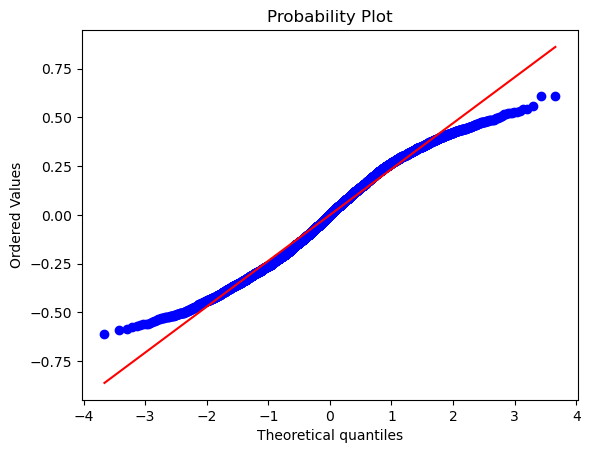

In [130]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

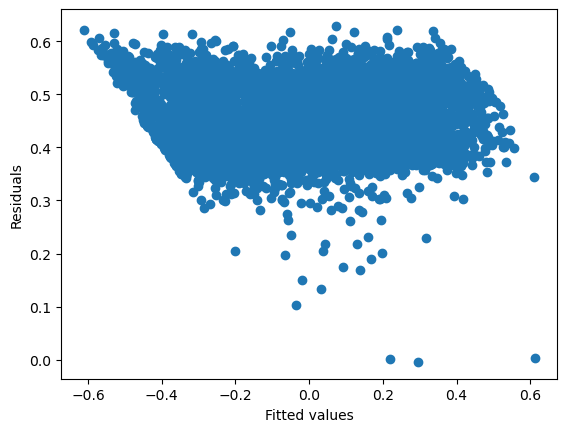

In [132]:
plt.scatter( model.resid, model.fittedvalues,)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


In [134]:
from statsmodels.robust.norms import HuberT

model_robust = sm.RLM(y, X, M=HuberT())
results_robust = model_robust.fit()

print(results_robust.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:00:11                                         
No. Iterations:                          14                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

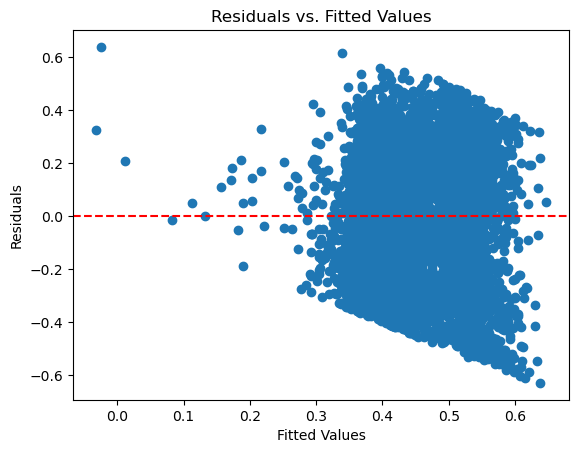

In [136]:
import matplotlib.pyplot as plt
rlm_results = results_robust
# Assuming you have the fitted values and residuals from your RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

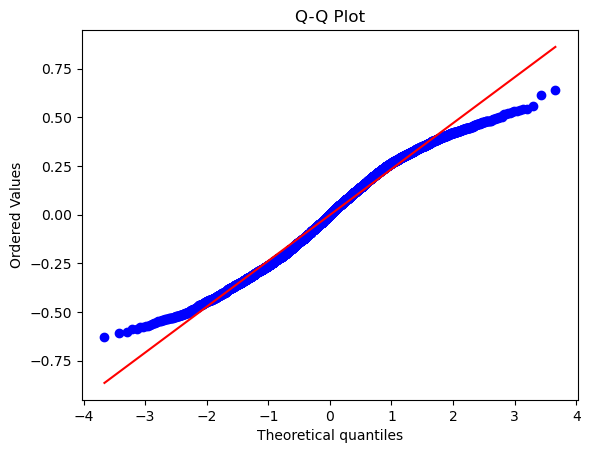

In [137]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [139]:
import numpy as np
X_transformed = np.log(X + 1)
y_transformed = np.log(y + 1)  # Adding 1 to avoid log(0)
model_transformed = sm.RLM(y_transformed, X_transformed, M=sm.robust.norms.HuberT()).fit()
print(model_transformed.summary())


                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:19:07                                         
No. Iterations:                          18                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

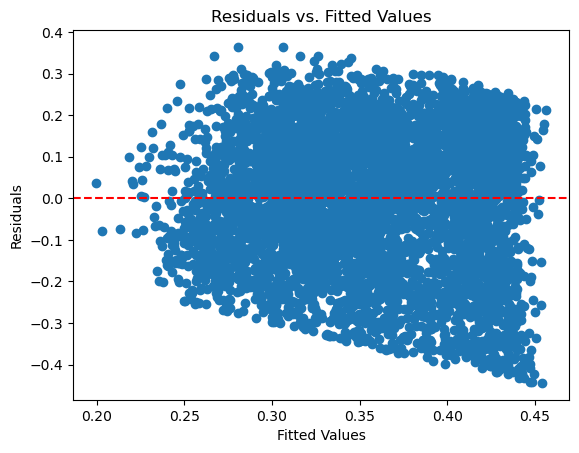

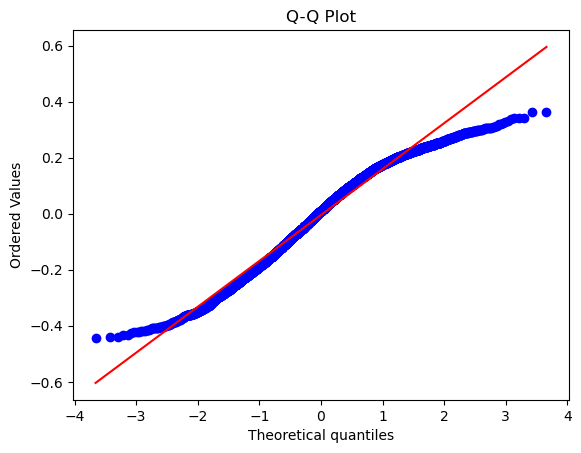

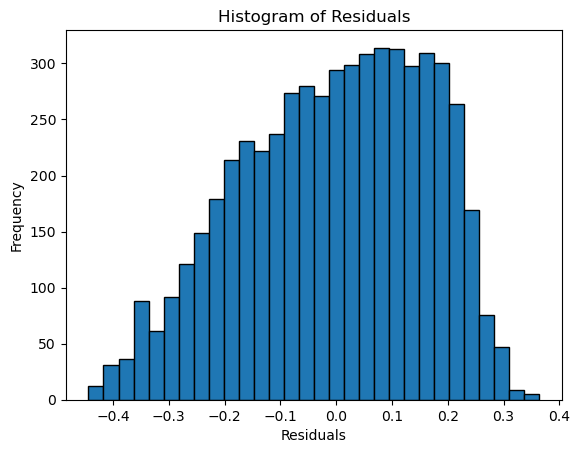

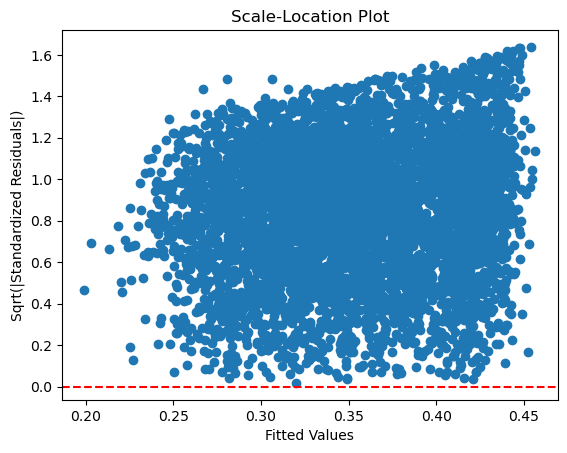

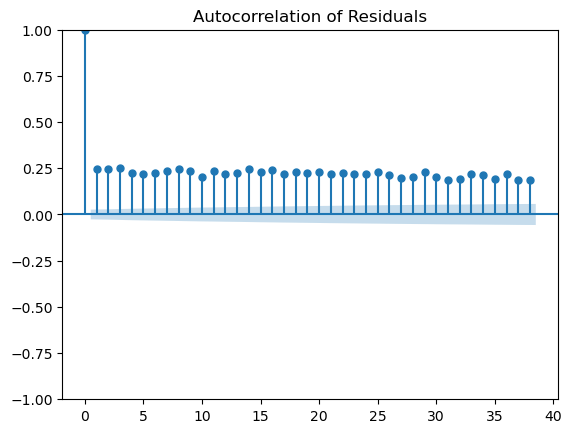

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.regressionplots import plot_leverage_resid2
rlm_results = model_transformed
# Assuming rlm_results is your fitted RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid
standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram of Residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Scale-Location Plot
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()



# Autocorrelation Plot
plot_acf(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()


In [127]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
from sklearn.preprocessing import StandardScaler

# Create the X and y variables for the regression
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']
# Normalize X
scaler = StandardScaler()
X_normalized = sm.add_constant(scaler.fit_transform(X))


# Fit the regression model
model_robust = sm.RLM(y, X_normalized, M=HuberT())
results = model_robust.fit()

# Print the regression results
print(results.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Wed, 26 Jun 2024                                         
Time:                              15:58:36                                         
No. Iterations:                          14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [143]:
# Breusch-Pagan Test for heteroscedasticity
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(residuals, rlm_results.model.exog)
print(f'Lagrange multiplier statistic: {test[0]}, p-value: {test[1]}')

# Durbin-Watson Test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Jarque-Bera Test for normality
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(residuals)
print(f'Jarque-Bera statistic: {jb_stat}, p-value: {jb_p_value}')

Lagrange multiplier statistic: 339.0673611959829, p-value: 3.473891945124928e-73
Durbin-Watson statistic: 1.5016739165487012
Jarque-Bera statistic: 209.3340978339233, p-value: 3.496859782494418e-46


## IDEB

In [90]:
import pandas as pd

ideb = pd.read_excel("divulgacao_ensino_medio_municipios_2023\divulgacao_ensino_medio_municipios_2023\divulgacao_ensino_medio_municipios_2023.xlsx", skiprows=7, skipfooter=12)
votos_centrao = pd.read_csv("regress2022_dados.csv")



In [91]:
ideb

Unnamed: 0    Unnamed: 1             Unnamed: 2 Unnamed: 3  \
0                  NaN           NaN                    NaN        NaN   
1                SG_UF  CO_MUNICIPIO           NO_MUNICIPIO       REDE   
2                   RO       1100015  Alta Floresta D'Oeste   Estadual   
3                   RO       1100015  Alta Floresta D'Oeste    Pública   
4                   RO       1100023              Ariquemes   Estadual   
...                ...           ...                    ...        ...   
11720               DF       5300108               Brasília   Estadual   
11721               DF       5300108               Brasília    Federal   
11722               DF       5300108               Brasília    Pública   
11723              NaN           NaN                    NaN        NaN   
11724  Fonte: MEC/Inep           NaN                    NaN        NaN   

                   Unnamed: 4           Unnamed: 5           Unnamed: 6  \
0                       Total             1ª série             2ª série   
1      VL_APROVACAO_2017_SI_4  VL_APROVACAO_2017_1  VL_APROVACAO_2017_2   
2                        88.1                   85                 90.4   
3                        88.1                   85                 90.4   
4                        82.6                 77.9                   83   
...                       ...                  ...                  ...   
11720                    78.3                 70.9                 81.8   
11721                    87.2                 80.9                   92   
11722                    78.5                 71.2                 82.1   
11723                     NaN                  NaN                  NaN   
11724                     NaN                  NaN                  NaN   

                Unnamed: 7           Unnamed: 8                   Unnamed: 9  \
0                 3ª série             4ª série  Indicador de Rendimento (P)   
1      VL_APROVACAO_2017_3  VL_APROVACAO_2017_4       VL_INDICADOR_REND_2017   
2                     90.4                    -                     0.885253   
3                     90.4                    -                     0.885253   
4                     91.7                    -                     0.838216   
...                    ...                  ...                          ...   
11720                 85.7                    -                     0.789517   
11721                 94.6                    -                     0.887539   
11722                 85.8                    -                      0.79197   
11723                  NaN                  NaN                          NaN   
11724                  NaN                  NaN                          NaN   

       ... Nota Média Padronizada (N).2             Matemática.3  \
0      ...                          NaN                      NaN   
1      ...           VL_NOTA_MEDIA_2021  VL_NOTA_MATEMATICA_2023   
2      ...                     4.326666                   274.69   
3      ...                     4.326666                   274.69   
4      ...                     4.437153                   269.37   
...    ...                          ...                      ...   
11720  ...                     4.694515                    263.1   
11721  ...                            -                    314.4   
11722  ...                        4.736                    265.3   
11723  ...                          NaN                      NaN   
11724  ...                          NaN                      NaN   

          Língua Portuguesa.3 Nota Média Padronizada (N).3        Unnamed: 40  \
0                         NaN                          NaN                NaN   
1      VL_NOTA_PORTUGUES_2023           VL_NOTA_MEDIA_2023  VL_OBSERVADO_2017   
2                      273.68                     4.644526                3.9   
3                      273.68                     4.644526                3.9   
4                      271.11          

In [92]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(ideb):
    # Select columns: 'Unnamed: 0', 'Unnamed: 1' and 4 other columns
    ideb = ideb.loc[:, ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Nota Média Padronizada (N).3', 'Unnamed: 43', 'Unnamed: 42', 'Unnamed: 41', 'Unnamed: 40', 'Nota Média Padronizada (N).2', 'Nota Média Padronizada (N).1', 'Nota Média Padronizada (N)']]
    return ideb

ideb_clean = clean_data(ideb.copy())
ideb_clean.columns = ideb_clean.iloc[1]
ideb_clean = ideb_clean.iloc[2:-2]
ideb_clean.head()

1 SG_UF CO_MUNICIPIO           NO_MUNICIPIO      REDE VL_NOTA_MEDIA_2023  \
2    RO      1100015  Alta Floresta D'Oeste  Estadual           4.644526   
3    RO      1100015  Alta Floresta D'Oeste   Pública           4.644526   
4    RO      1100023              Ariquemes  Estadual           4.531334   
5    RO      1100023              Ariquemes   Federal                  -   
6    RO      1100023              Ariquemes   Pública           4.620059   

1 VL_OBSERVADO_2023 VL_OBSERVADO_2021 VL_OBSERVADO_2019 VL_OBSERVADO_2017  \
2               4.5               3.9               4.5               3.9   
3               4.5               3.9               4.5               3.9   
4               4.1               4.1               3.9               3.8   
5                 -                 -                 -                 -   
6               4.2               3.9                 4               3.8   

1 VL_NOTA_MEDIA_2021 VL_NOTA_MEDIA_2019 VL_NOTA_MEDIA_2017  
2           4.326666           4.863751           4.379528  
3           4.326666           4.863751           4.379528  
4           4.437153            4.72569            4.47829  
5                  -                  -                  -  
6           4.437153           4.775508            4.49116

In [93]:
ideb_clean['VL_OBSERVADO_2023'] = ideb_clean['VL_OBSERVADO_2023'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2023'] = ideb_clean['VL_NOTA_MEDIA_2023'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2021'] = ideb_clean['VL_OBSERVADO_2021'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2021'] = ideb_clean['VL_NOTA_MEDIA_2021'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2019'] = ideb_clean['VL_OBSERVADO_2019'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2019'] = ideb_clean['VL_NOTA_MEDIA_2019'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_OBSERVADO_2017'] = ideb_clean['VL_OBSERVADO_2017'].replace("-", "Nan").astype(float, errors='ignore')
ideb_clean['VL_NOTA_MEDIA_2017'] = ideb_clean['VL_NOTA_MEDIA_2017'].replace("-", "Nan").astype(float, errors='ignore')


ideb_clean

1     SG_UF CO_MUNICIPIO           NO_MUNICIPIO      REDE  VL_NOTA_MEDIA_2023  \
2        RO      1100015  Alta Floresta D'Oeste  Estadual            4.644526   
3        RO      1100015  Alta Floresta D'Oeste   Pública            4.644526   
4        RO      1100023              Ariquemes  Estadual            4.531334   
5        RO      1100023              Ariquemes   Federal                 NaN   
6        RO      1100023              Ariquemes   Pública            4.620059   
...     ...          ...                    ...       ...                 ...   
11718    GO      5222302          Vila Propício  Estadual            4.437978   
11719    GO      5222302          Vila Propício   Pública            4.437978   
11720    DF      5300108               Brasília  Estadual            4.417823   
11721    DF      5300108               Brasília   Federal            5.638628   
11722    DF      5300108               Brasília   Pública            4.470129   

1      VL_OBSERVADO_2023  VL_OBSERVADO_2021  VL_OBSERVADO_2019  \
2                    4.5                3.9                4.5   
3                    4.5                3.9                4.5   
4                    4.1                4.1                3.9   
5                    NaN                NaN                NaN   
6                    4.2                3.9                4.0   
...                  ...                ...                ...   
11718                4.4                4.6                4.4   
11719                4.4                4.6                4.4   
11720                3.7                4.0                4.0   
11721                5.1                NaN                NaN   
11722                3.8                4.0                4.0   

1      VL_OBSERVADO_2017  VL_NOTA_MEDIA_2021  VL_NOTA_MEDIA_2019  \
2                    3.9            4.326666            4.863751   
3                    3.9            4.326666            4.863751   
4                    3.8            4.437153            4.725690   
5                    NaN                 NaN                 NaN   
6                    3.8            4.437153            4.775508   
...                  ...                 ...                 ...   
11718                4.5            4.629550            4.520494   
11719                4.5            4.629550            4.520494   
11720                3.4            4.694515            4.757562   
11721                5.3                 NaN                 NaN   
11722                3.4            4.736000            4.806329   

1      VL_NOTA_MEDIA_2017  
2                4.379528  
3                4.379528  
4                4.478290  
5                     NaN  
6                4.491160  
...                   ...  
11718            4.549669  
11719            4.549669  
11720            4.319077  
11721            6.010421  
11722            4.344395  

[11721 rows x 12 columns]

In [94]:
ideb_clean = ideb_clean.reset_index(drop=True)

## Publica IDEB

In [10]:
ideb_clean_pub = ideb_clean[ideb_clean['REDE'] == 'Pública']
merged_ideb = votos_centrao.merge(ideb_clean_pub, left_on='ibge', right_on='CO_MUNICIPIO')

In [11]:
merged_ideb

Unnamed: 0        regiao     ibge          municipio  pib_per_capita  \
0              0         Norte  1100023          ARIQUEMES        28878.27   
1              1         Norte  1100031             CABIXI        47051.83   
2              2         Norte  1100049             CACOAL        32313.26   
3              3         Norte  1100056         CEREJEIRAS        46185.81   
4              4         Norte  1100064  COLORADO DO OESTE        27923.92   
...          ...           ...      ...                ...             ...   
5454        5465  Centro-oeste  5221908             VARJÃO        27309.69   
5455        5466  Centro-oeste  5222005         VIANÓPOLIS        60900.61   
5456        5467  Centro-oeste  5222054     VICENTINÓPOLIS        53340.72   
5457        5468  Centro-oeste  5222203           VILA BOA        27886.97   
5458        5469  Centro-oeste  5222302      VILA PROPÍCIO        51845.31   

      uf                                                vab    Impostos  \
0     RO                                    Demais serviços  420195.360   
1     RO  Agricultura, inclusive apoio à agricultura e a...   11192.685   
2     RO                                    Demais serviços  384606.648   
3     RO  Comércio e reparação de veículos automotores e...  131903.932   
4     RO  Administração, defesa, educação e saúde públic...   33010.713   
...   ..                                                ...         ...   
5454  GO               Pecuária, inclusive apoio à pecuária    5086.984   
5455  GO  Agricultura, inclusive apoio à agricultura e a...   66056.200   
5456  GO  Agricultura, inclusive apoio à agricultura e a...   31899.784   
5457  GO  Agricultura, inclusive apoio à agricultura e a...   14192.317   
5458  GO  Agricultura, inclusive apoio à agricultura e a...   12864.747   

          populacao  taxa_analfabetismo  ...       NO_MUNICIPIO     REDE  \
0     111147.980852              0.0592  ...          Ariquemes  Pública   
1       5067.000115              0.1018  ...             Cabixi  Pública   
2      86416.002626              0.0629  ...             Cacoal  Pública   
3      16088.001401              0.0785  ...         Cerejeiras  Pública   
4      15213.000324              0.0953  ...  Colorado do Oeste  Pública   
...             ...                 ...  ...                ...      ...   
5454    3848.000362              0.1116  ...             Varjão  Pública   
5455   14088.000826              0.0655  ...         Vianópolis  Pública   
5456    9001.999654              0.0913  ...     Vicentinópolis  Pública   
5457    6450.999517              0.1283  ...           Vila Boa  Pública   
5458    5941.000314              0.1432  ...      Vila Propício  Pública   

      VL_NOTA_MEDIA_2023  VL_OBSERVADO_2023  VL_OBSERVADO_2021  \
0               4.620059                4.2                3.9   
1               4.212595                4.1                4.1   
2               4.507969                4.2                4.2   
3               4.635988                4.1                NaN   
4               4.868454                4.7                NaN   
...                  ...                ...                ...   
5454            5.039525                5.0                4.0   
5455            5.145802                5.1                4.5   
5456            4.742368                4.7                4.6   
5457            4.872678                4.9                4.0   
5458            4.437978                4.4                4.6   

      VL_OBSERVADO_2019  VL_OBSERVADO_2017  VL_NOTA_MEDIA_2021  \
0                   4.0                3.8            4.437153   
1                   NaN                3.7            4.283235   
2                   4.4                3.9            4.508396   
3                   4.6                3.8                 NaN   
4                   4.7                4.3                 NaN   
...                 ...                ...                 ...   


In [12]:
merged_ideb['percentage_votos_centrao'].corr(merged_ideb['VL_OBSERVADO_2023'])

-0.09824193229686173

In [13]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['VL_OBSERVADO_2023'], nan_policy='omit')

print(f'Spearman correlation IDEB: {corr}, p-value: {p_value}')

Spearman correlation IDEB: -0.08947643734067429, p-value: 2.5786477666533176e-10


In [14]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['VL_NOTA_MEDIA_2023'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: -0.15872013402242627, p-value: 1.9809645911748785e-29


In [15]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))


# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(round(state_correlations_df.sort_values(by='p_value'), 4))

       correlation  p_value
SG_UF                      
SP         -0.1242   0.0023
MT          0.2476   0.0050
PI         -0.1637   0.0170
RJ          0.2317   0.0289
MS          0.2694   0.0409
TO          0.1764   0.0430
SC         -0.1378   0.0601
MG         -0.0676   0.0615
CE          0.1375   0.0635
AP         -0.4193   0.1538
PE         -0.0646   0.3865
MA          0.0593   0.3980
ES          0.0995   0.4055
GO          0.0492   0.4603
RS          0.0369   0.4758
BA          0.0339   0.4969
AM          0.0864   0.5080
AC         -0.1272   0.5930
RN         -0.0471   0.6052
RO          0.0759   0.6244
RR         -0.1359   0.6579
AL          0.0341   0.7454
PB         -0.0186   0.7914
PA         -0.0169   0.8434
SE         -0.0170   0.8898
PR          0.0036   0.9446


In [16]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(round(state_correlations_df.sort_values(by='p_value'), 4))

       correlation  p_value
SG_UF                      
MG         -0.1745   0.0000
SC         -0.3327   0.0000
RN         -0.3308   0.0002
SP         -0.1310   0.0013
MT          0.2229   0.0118
PI         -0.1430   0.0375
TO          0.1676   0.0547
AL          0.1723   0.0985
CE          0.1075   0.1476
RJ          0.1418   0.1849
PE         -0.0859   0.2486
SE          0.1351   0.2683
AP         -0.3187   0.2886
AC         -0.1774   0.4542
MA          0.0493   0.4829
GO          0.0453   0.4970
RR         -0.2033   0.5053
MS         -0.0740   0.5810
RO         -0.0809   0.6016
PA         -0.0425   0.6181
AM          0.0400   0.7597
PR          0.0134   0.7950
RS          0.0112   0.8285
PB         -0.0120   0.8650
BA         -0.0014   0.9782
ES         -0.0003   0.9983


In [17]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.441      0.0
Nordeste           -0.150      0.0
Norte              -0.220      0.0
Sudeste            -0.151      0.0
Sul                 0.224      0.0


In [18]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.373    0.000
Nordeste           -0.084    0.001
Norte              -0.147    0.002
Sudeste            -0.189    0.000
Sul                -0.154    0.000


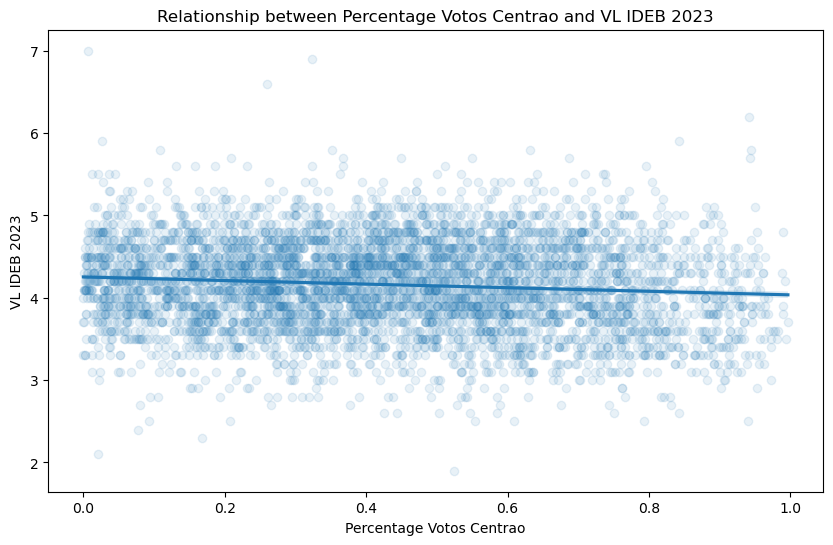

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage_votos_centrao', y='VL_OBSERVADO_2023', data=merged_ideb, scatter_kws={'alpha':0.1})
plt.xlabel('Percentage Votos Centrao')
plt.ylabel('VL IDEB 2023')
plt.title('Relationship between Percentage Votos Centrao and VL IDEB 2023')
plt.show()

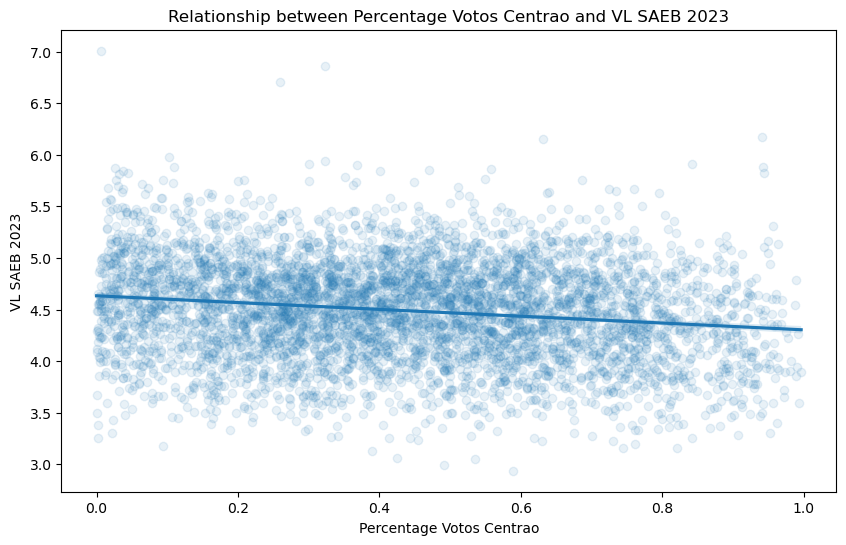

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage_votos_centrao', y='VL_NOTA_MEDIA_2023', data=merged_ideb, scatter_kws={'alpha':0.1})
plt.xlabel('Percentage Votos Centrao')
plt.ylabel('VL SAEB 2023')
plt.title('Relationship between Percentage Votos Centrao and VL SAEB 2023')
plt.show()

## Privada IDEB

In [95]:
ideb_clean_priv = ideb_clean[ideb_clean['REDE'] == 'Privada']
merged_ideb_priv = votos_centrao.merge(ideb_clean_pub, left_on='ibge', right_on='CO_MUNICIPIO')

In [96]:
merged_ideb_priv

Unnamed: 0        regiao     ibge          municipio  pib_per_capita  \
0              0         Norte  1100023          ARIQUEMES        28878.27   
1              1         Norte  1100031             CABIXI        47051.83   
2              2         Norte  1100049             CACOAL        32313.26   
3              3         Norte  1100056         CEREJEIRAS        46185.81   
4              4         Norte  1100064  COLORADO DO OESTE        27923.92   
...          ...           ...      ...                ...             ...   
5454        5465  Centro-oeste  5221908             VARJÃO        27309.69   
5455        5466  Centro-oeste  5222005         VIANÓPOLIS        60900.61   
5456        5467  Centro-oeste  5222054     VICENTINÓPOLIS        53340.72   
5457        5468  Centro-oeste  5222203           VILA BOA        27886.97   
5458        5469  Centro-oeste  5222302      VILA PROPÍCIO        51845.31   

      uf                                                vab    Impostos  \
0     RO                                    Demais serviços  420195.360   
1     RO  Agricultura, inclusive apoio à agricultura e a...   11192.685   
2     RO                                    Demais serviços  384606.648   
3     RO  Comércio e reparação de veículos automotores e...  131903.932   
4     RO  Administração, defesa, educação e saúde públic...   33010.713   
...   ..                                                ...         ...   
5454  GO               Pecuária, inclusive apoio à pecuária    5086.984   
5455  GO  Agricultura, inclusive apoio à agricultura e a...   66056.200   
5456  GO  Agricultura, inclusive apoio à agricultura e a...   31899.784   
5457  GO  Agricultura, inclusive apoio à agricultura e a...   14192.317   
5458  GO  Agricultura, inclusive apoio à agricultura e a...   12864.747   

          populacao  taxa_analfabetismo  ...       NO_MUNICIPIO     REDE  \
0     111147.980852              0.0592  ...          Ariquemes  Pública   
1       5067.000115              0.1018  ...             Cabixi  Pública   
2      86416.002626              0.0629  ...             Cacoal  Pública   
3      16088.001401              0.0785  ...         Cerejeiras  Pública   
4      15213.000324              0.0953  ...  Colorado do Oeste  Pública   
...             ...                 ...  ...                ...      ...   
5454    3848.000362              0.1116  ...             Varjão  Pública   
5455   14088.000826              0.0655  ...         Vianópolis  Pública   
5456    9001.999654              0.0913  ...     Vicentinópolis  Pública   
5457    6450.999517              0.1283  ...           Vila Boa  Pública   
5458    5941.000314              0.1432  ...      Vila Propício  Pública   

      VL_NOTA_MEDIA_2023  VL_OBSERVADO_2023  VL_OBSERVADO_2021  \
0               4.620059                4.2                3.9   
1               4.212595                4.1                4.1   
2               4.507969                4.2                4.2   
3               4.635988                4.1                NaN   
4               4.868454                4.7                NaN   
...                  ...                ...                ...   
5454            5.039525                5.0                4.0   
5455            5.145802                5.1                4.5   
5456            4.742368                4.7                4.6   
5457            4.872678                4.9                4.0   
5458            4.437978                4.4                4.6   

      VL_OBSERVADO_2019  VL_OBSERVADO_2017  VL_NOTA_MEDIA_2021  \
0                   4.0                3.8            4.437153   
1                   NaN                3.7            4.283235   
2                   4.4                3.9            4.508396   
3                   4.6                3.8                 NaN   
4                   4.7                4.3                 NaN   
...                 ...                ...                 ...   


In [97]:
merged_ideb_priv['percentage_votos_centrao'].corr(merged_ideb['VL_OBSERVADO_2023']), merged_ideb_priv['percentage_votos_centrao'].corr(merged_ideb['VL_NOTA_MEDIA_2023'])

(-0.09824193229686173, -0.16949547022280795)

In [98]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb_priv['percentage_votos_centrao'], merged_ideb_priv['VL_OBSERVADO_2023'], nan_policy='omit')

print(f'Spearman correlation IDEB: {corr}, p-value: {p_value}')

Spearman correlation IDEB: -0.08947643734067429, p-value: 2.5786477666533176e-10


In [99]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb_priv['percentage_votos_centrao'], merged_ideb_priv['VL_NOTA_MEDIA_2023'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: -0.15872013402242627, p-value: 1.9809645911748785e-29


In [100]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb_priv.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
SP       -0.124173  0.002331
MT        0.247560  0.005015
PI       -0.163727  0.017036
RJ        0.231652  0.028939
MS        0.269374  0.040874
TO        0.176415  0.043025
SC       -0.137770  0.060065
MG       -0.067589  0.061523
CE        0.137468  0.063495
AP       -0.419314  0.153791
PE       -0.064573  0.386468
MA        0.059346  0.397965
ES        0.099540  0.405458
GO        0.049246  0.460321
RS        0.036935  0.475789
BA        0.033856  0.496861
AM        0.086375  0.508039
AC       -0.127228  0.592979
RN       -0.047069  0.605170
RO        0.075892  0.624399
RR       -0.135929  0.657925
AL        0.034121  0.745412
PB       -0.018631  0.791403
PA       -0.016850  0.843356
SE       -0.016992  0.889786
PR        0.003593  0.944639


In [101]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb_priv.groupby('SG_UF').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(round(state_correlations_df.sort_values(by='p_value'), 4))

       correlation  p_value
SG_UF                      
MG         -0.1745   0.0000
SC         -0.3327   0.0000
RN         -0.3308   0.0002
SP         -0.1310   0.0013
MT          0.2229   0.0118
PI         -0.1430   0.0375
TO          0.1676   0.0547
AL          0.1723   0.0985
CE          0.1075   0.1476
RJ          0.1418   0.1849
PE         -0.0859   0.2486
SE          0.1351   0.2683
AP         -0.3187   0.2886
AC         -0.1774   0.4542
MA          0.0493   0.4829
GO          0.0453   0.4970
RR         -0.2033   0.5053
MS         -0.0740   0.5810
RO         -0.0809   0.6016
PA         -0.0425   0.6181
AM          0.0400   0.7597
PR          0.0134   0.7950
RS          0.0112   0.8285
PB         -0.0120   0.8650
BA         -0.0014   0.9782
ES         -0.0003   0.9983


In [102]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb_priv.groupby('regiao').apply(lambda x: spearmanr(x['VL_OBSERVADO_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Display the correlations
print(regiao_correlations)

regiao
Centro-oeste      (0.4410847279446049, 4.8281114443538775e-21)
Nordeste          (-0.14991225716160228, 6.93520374208618e-10)
Norte           (-0.22032184743274627, 4.7787956272437035e-06)
Sudeste          (-0.15128525637497262, 2.864399030059164e-09)
Sul                (0.2239521465074165, 3.974125058368434e-12)
dtype: object


In [103]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb_priv.groupby('regiao').apply(lambda x: spearmanr(x['VL_NOTA_MEDIA_2023'], x['percentage_votos_centrao'], nan_policy='omit'))

# Display the correlations
print(regiao_correlations)

regiao
Centro-oeste      (0.37260569060579757, 5.133690437529319e-15)
Nordeste         (-0.08427521468865651, 0.0005529263762719961)
Norte            (-0.14743884252815848, 0.0023655718448085793)
Sudeste         (-0.18870185067860212, 1.0673736351429756e-13)
Sul              (-0.15444797164549315, 2.009353180163377e-06)
dtype: object


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


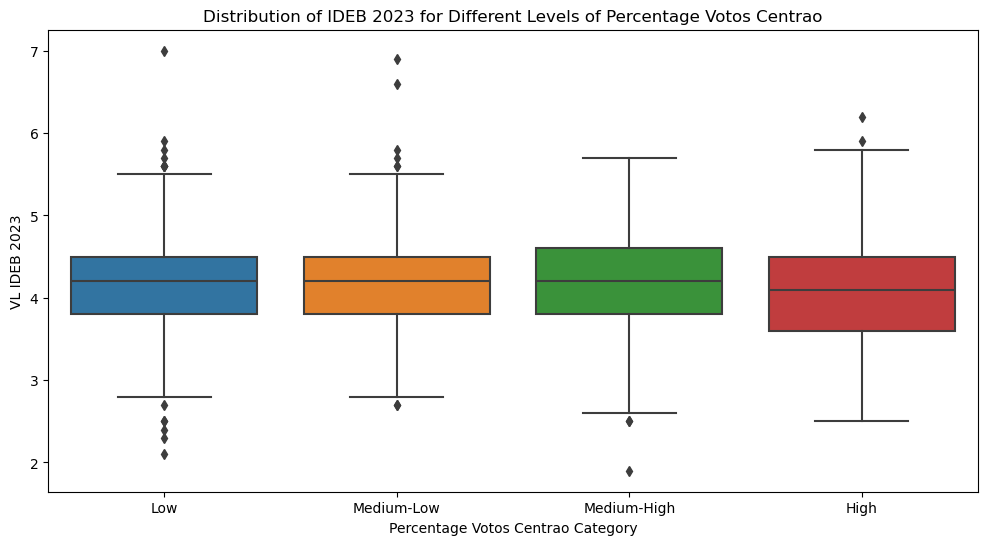

In [104]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.boxplot(x='votos_centrao_category', y='VL_OBSERVADO_2023', data=merged_ideb)
plt.xlabel('Percentage Votos Centrao Category')
plt.ylabel('VL IDEB 2023')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


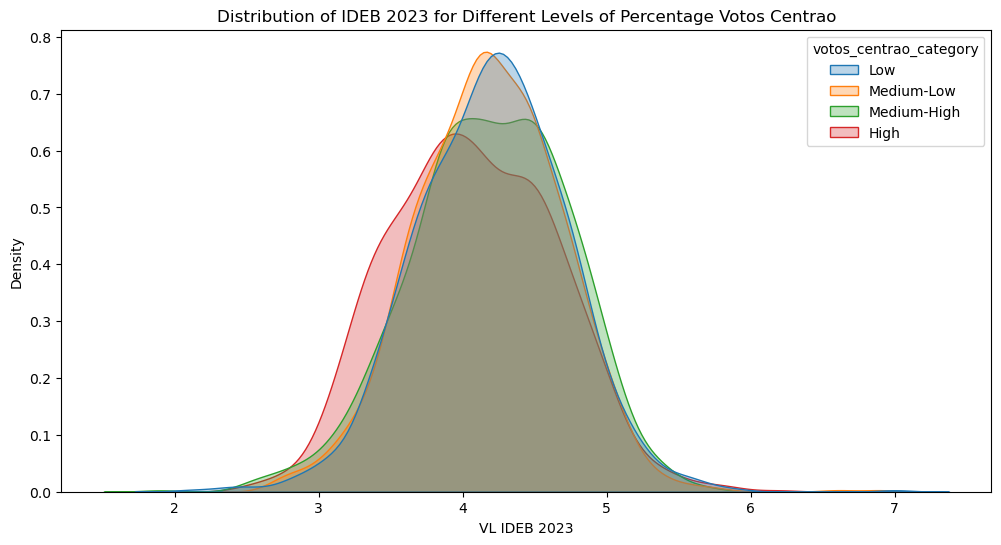

In [105]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='VL_OBSERVADO_2023', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL IDEB 2023')
plt.ylabel('Density')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

In [106]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='VL_OBSERVADO_2023', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

votos_centrao_category       Low  Medium-Low  Medium-High      High
pib_category                                                       
Low                     4.091667    3.988492     3.951737  3.897810
Medium-Low              4.131760    4.136190     4.111170  4.050000
Medium-High             4.266038    4.276218     4.301149  4.333486
High                    4.245626    4.267683     4.366548  4.368212


In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('VL_OBSERVADO_2023 ~ C(pib_category) + C(votos_centrao_category) + C(pib_category):C(votos_centrao_category)', data=merged_ideb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                                sum_sq      df           F  \
C(pib_category)                              86.023633     3.0  106.552945   
C(votos_centrao_category)                     1.450613     3.0    1.796798   
C(pib_category):C(votos_centrao_category)    10.776680     9.0    4.449502   
Residual                                   1334.520265  4959.0         NaN   

                                                 PR(>F)  
C(pib_category)                            7.491625e-67  
C(votos_centrao_category)                  1.454924e-01  
C(pib_category):C(votos_centrao_category)  7.879902e-06  
Residual                                            NaN  


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


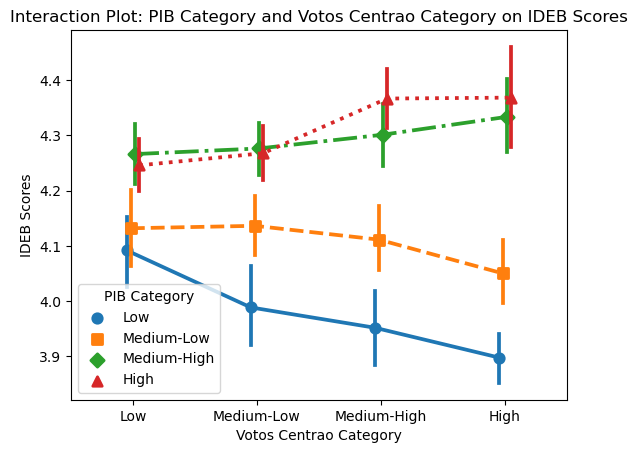

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='VL_OBSERVADO_2023', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on IDEB Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('IDEB Scores')
plt.legend(title='PIB Category')
plt.show()

In [109]:
import statsmodels.stats.multicomp as mc
# Filter out missing values

# Perform Tukey's HSD test for votos_centrao_category within High PIB category
subset_high = merged_ideb[merged_ideb['pib_category'] == 'High']
subset_high = subset_high.dropna(subset=['VL_OBSERVADO_2023', 'votos_centrao_category'])

tukey_high = mc.MultiComparison(subset_high['VL_OBSERVADO_2023'], subset_high['votos_centrao_category'])
tukey_result_high = tukey_high.tukeyhsd()

print('Tukey HSD results for High PIB category:')
print(tukey_result_high)

# Perform Tukey's HSD test for votos_centrao_category within Low PIB category
subset_low = merged_ideb[merged_ideb['pib_category'] == 'Low']
subset_low = subset_low.dropna(subset=['VL_OBSERVADO_2023', 'votos_centrao_category'])

tukey_low = mc.MultiComparison(subset_low['VL_OBSERVADO_2023'], subset_low['votos_centrao_category'])
tukey_result_low = tukey_low.tukeyhsd()
print('Tukey HSD results for Low PIB category:')
print(tukey_result_low)

Tukey HSD results for High PIB category:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
       High         Low  -0.1226 0.0471 -0.2441 -0.0011   True
       High Medium-High  -0.0017    1.0  -0.131  0.1277  False
       High  Medium-Low  -0.1005   0.17 -0.2266  0.0255  False
        Low Medium-High   0.1209  0.009  0.0223  0.2196   True
        Low  Medium-Low   0.0221 0.9316 -0.0723  0.1164  False
Medium-High  Medium-Low  -0.0989 0.0702 -0.2031  0.0053  False
--------------------------------------------------------------
Tukey HSD results for Low PIB category:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
       High         Low   0.1939    0.0  0.0864  0.3013   True
       High Medium-High   0.0539 0.54

In [110]:
# Perform simple effects analysis for votos_centrao_category within each PIB category
for category in merged_ideb['pib_category'].unique():
    subset = merged_ideb[merged_ideb['pib_category'] == category]
    model = ols('VL_OBSERVADO_2023 ~ C(votos_centrao_category)', data=subset).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'Simple effects for PIB category {category}:')
    print(anova_table)

Simple effects for PIB category Medium-High:
                               sum_sq      df         F    PR(>F)
C(votos_centrao_category)    0.703693     3.0  0.909196  0.435882
Residual                   317.070906  1229.0       NaN       NaN
Simple effects for PIB category High:
                               sum_sq      df         F    PR(>F)
C(votos_centrao_category)    3.522296     3.0  4.728321  0.002764
Residual                   292.759817  1179.0       NaN       NaN
Simple effects for PIB category Medium-Low:
                               sum_sq      df         F    PR(>F)
C(votos_centrao_category)    1.504000     3.0  1.812611  0.142993
Residual                   347.385492  1256.0       NaN       NaN
Simple effects for PIB category Low:
                               sum_sq      df         F    PR(>F)
C(votos_centrao_category)    6.497304     3.0  7.433447  0.000062
Residual                   377.304051  1295.0       NaN       NaN


c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


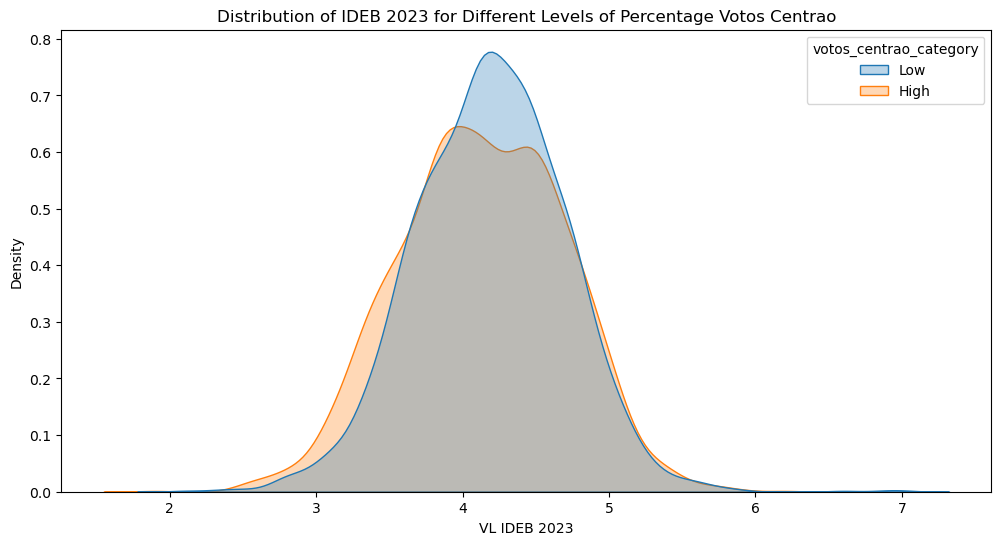

In [111]:
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='VL_OBSERVADO_2023', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL IDEB 2023')
plt.ylabel('Density')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

In [112]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='VL_OBSERVADO_2023', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

votos_centrao_category       Low      High
pib_category                              
Low                     4.089135  3.993483
High                    4.262835  4.336774


In [113]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('VL_OBSERVADO_2023 ~ C(pib_category) + C(votos_centrao_category) + C(pib_category):C(votos_centrao_category)', data=merged_ideb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                                sum_sq      df           F  \
C(pib_category)                              80.436626     1.0  295.969690   
C(votos_centrao_category)                     0.205930     1.0    0.757726   
C(pib_category):C(votos_centrao_category)     8.644488     1.0   31.807731   
Residual                                   1350.984513  4971.0         NaN   

                                                 PR(>F)  
C(pib_category)                            1.774009e-64  
C(votos_centrao_category)                  3.840830e-01  
C(pib_category):C(votos_centrao_category)  1.796249e-08  
Residual                                            NaN  


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


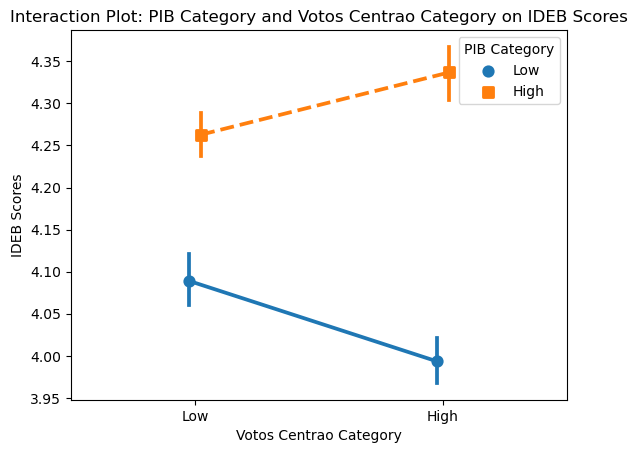

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='VL_OBSERVADO_2023', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on IDEB Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('IDEB Scores')
plt.legend(title='PIB Category')
plt.show()

C:\Temp\ipykernel_22508\3730666128.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_ideb.groupby(['uf','votos_centrao_category'])['VL_OBSERVADO_2023'].mean().diff()[1::2].plot(kind='bar', color='blue')


<Axes: xlabel='uf,votos_centrao_category'>

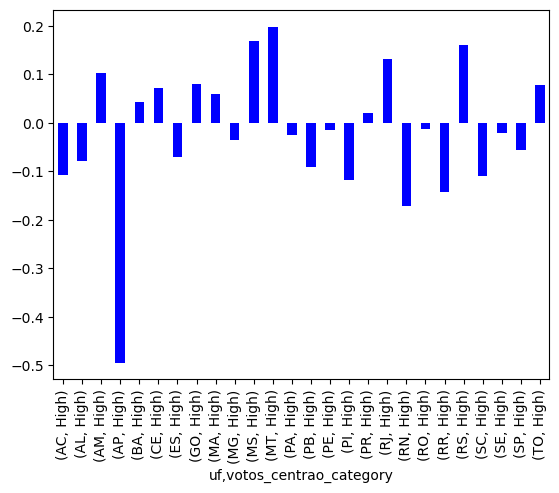

In [159]:
merged_ideb.groupby(['uf','votos_centrao_category'])['VL_OBSERVADO_2023'].mean().diff()[1::2].plot(kind='bar', color='blue')

C:\Temp\ipykernel_22508\3872202662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_ideb.groupby(['uf','pib_category'])['VL_OBSERVADO_2023'].mean().diff()[1::2].plot(kind='bar')


<Axes: xlabel='uf,pib_category'>

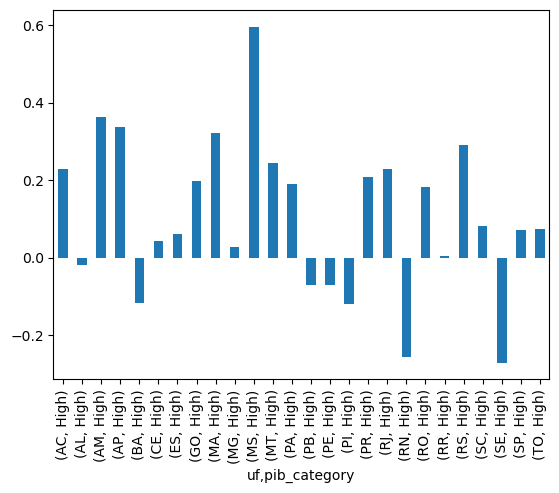

In [158]:
merged_ideb.groupby(['uf','pib_category'])['VL_OBSERVADO_2023'].mean().diff()[1::2].plot(kind='bar')

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


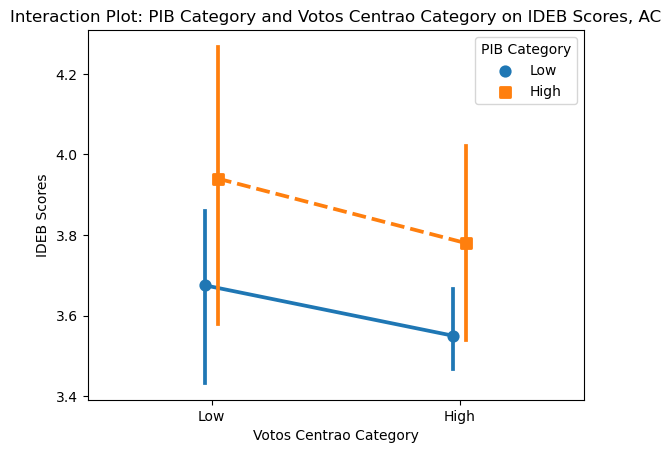

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


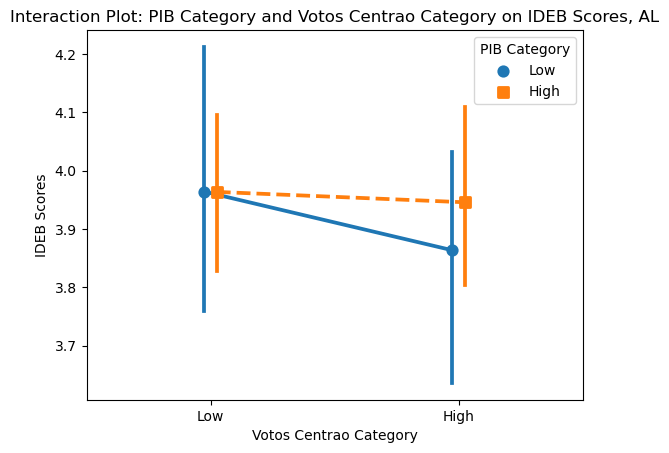

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


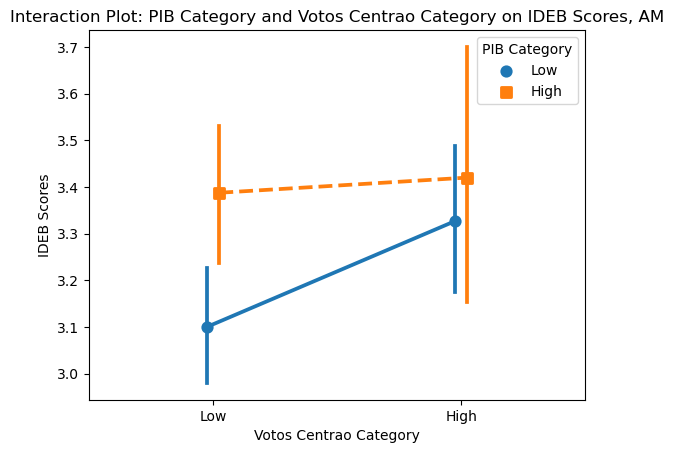

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


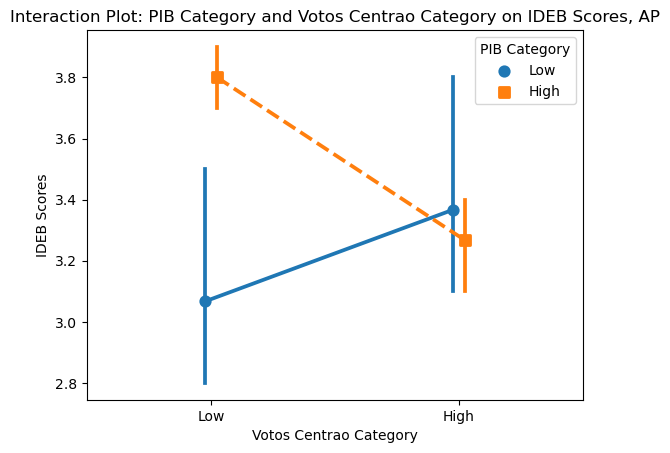

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


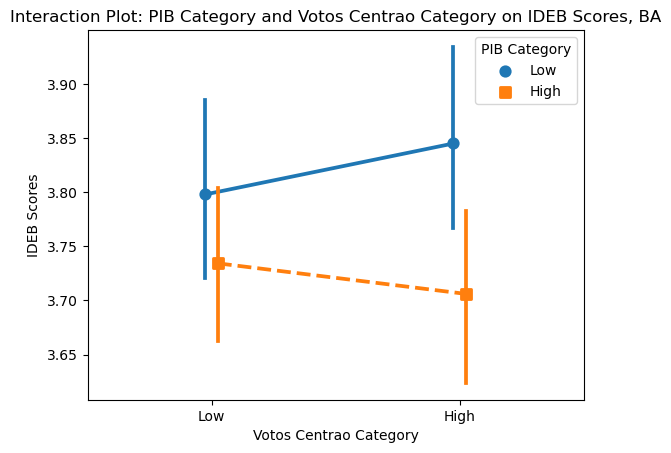

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


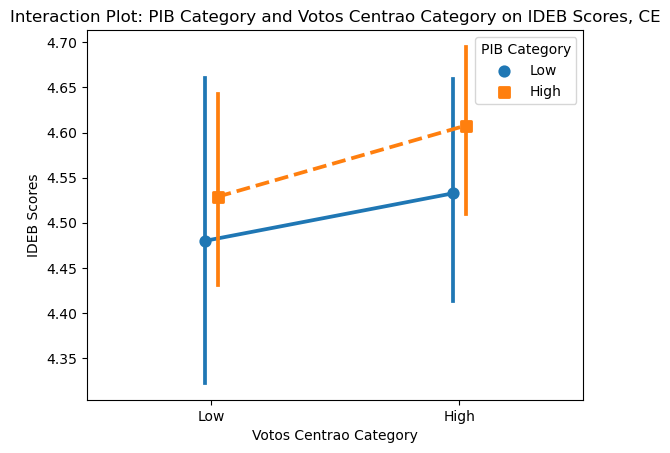

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


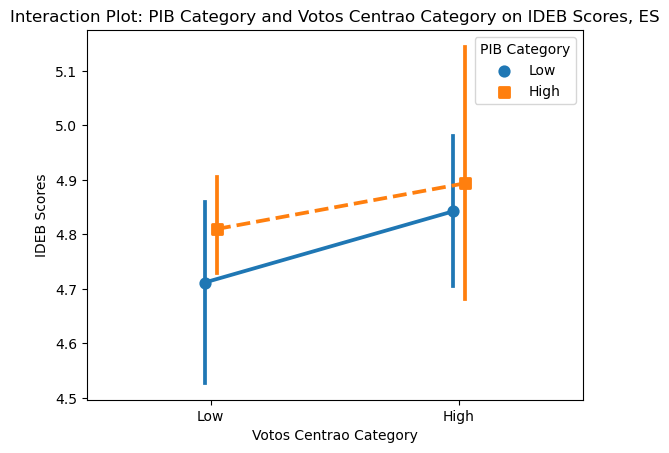

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


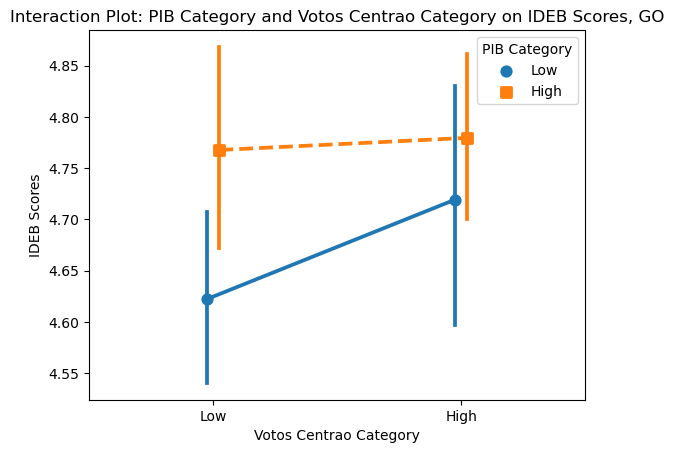

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


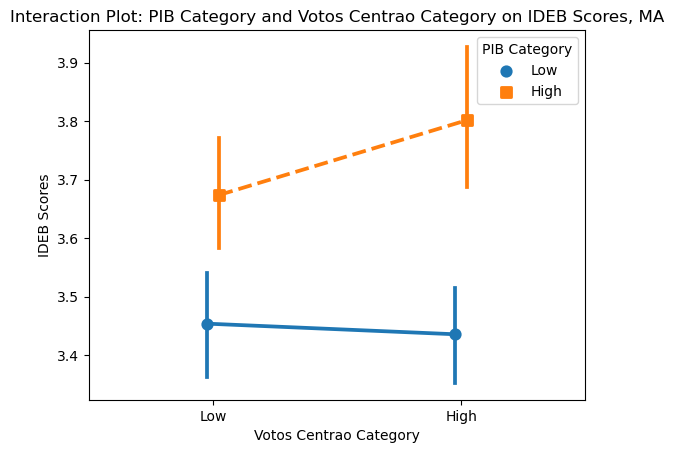

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


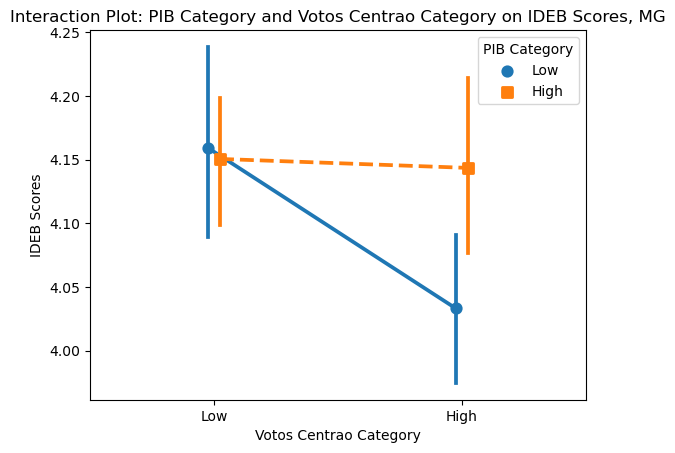

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


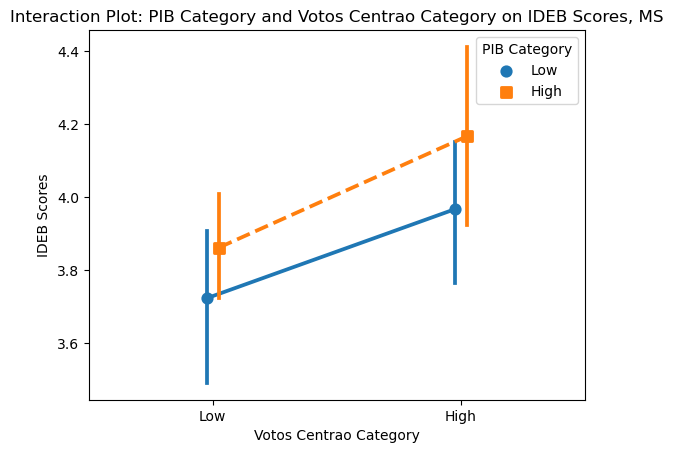

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


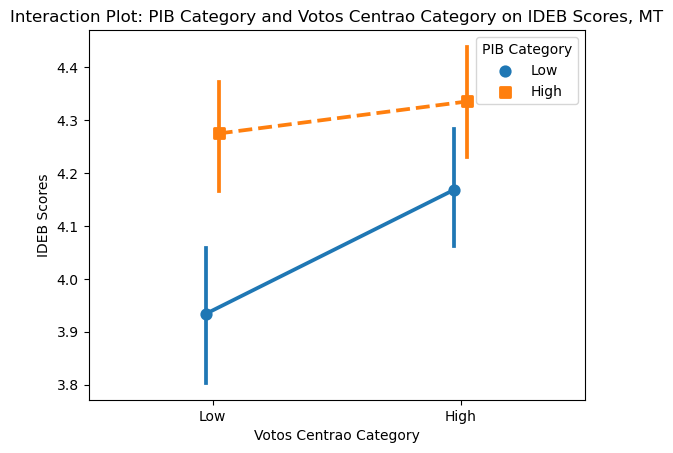

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


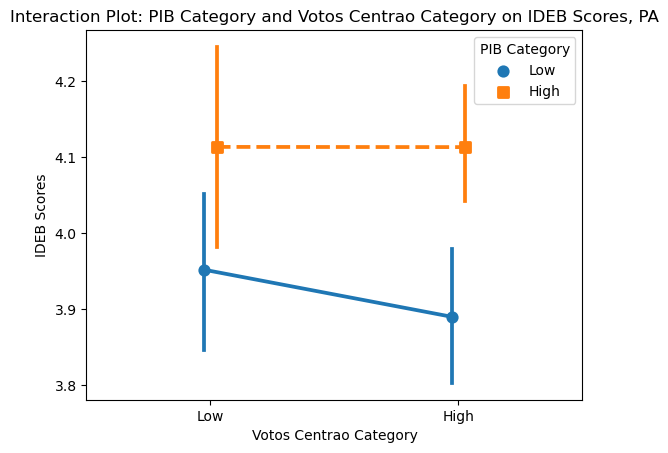

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


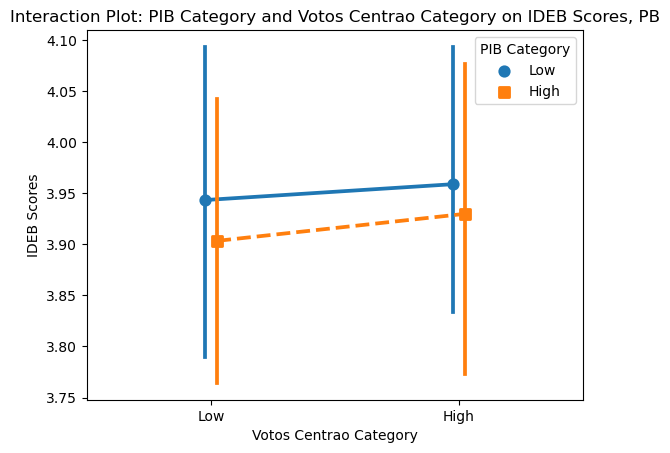

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


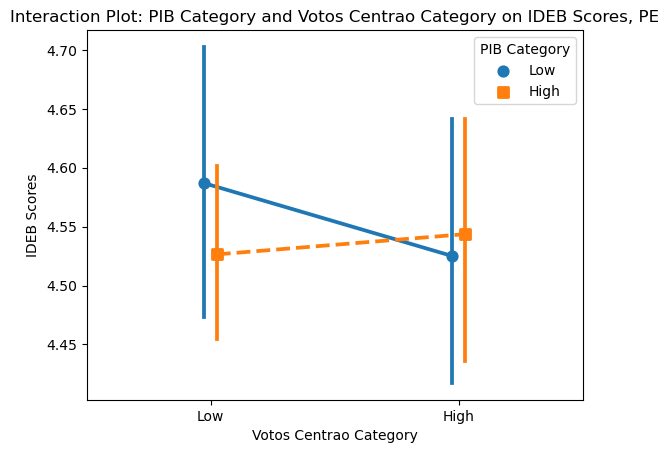

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


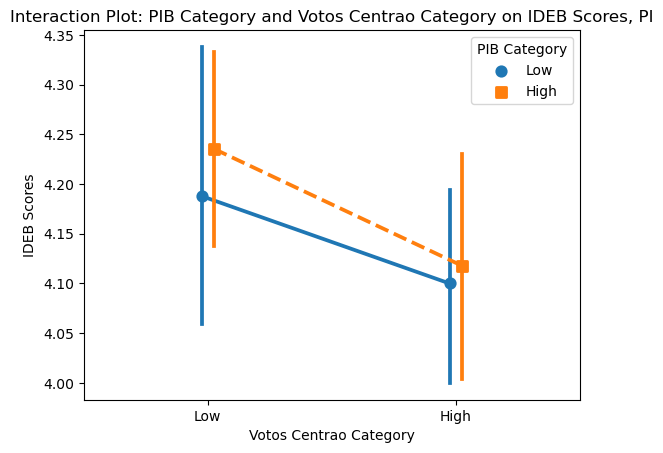

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


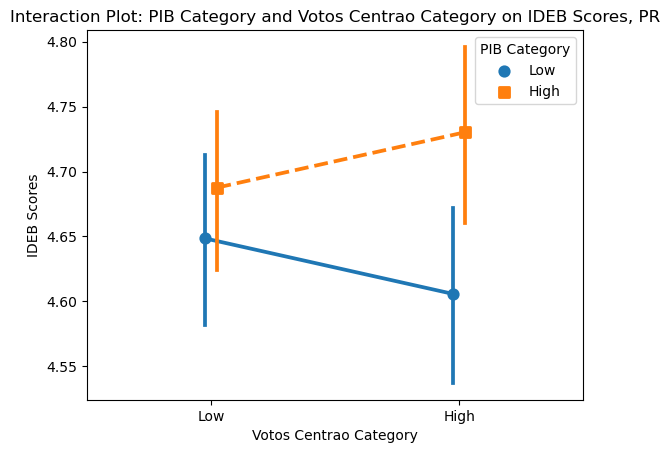

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


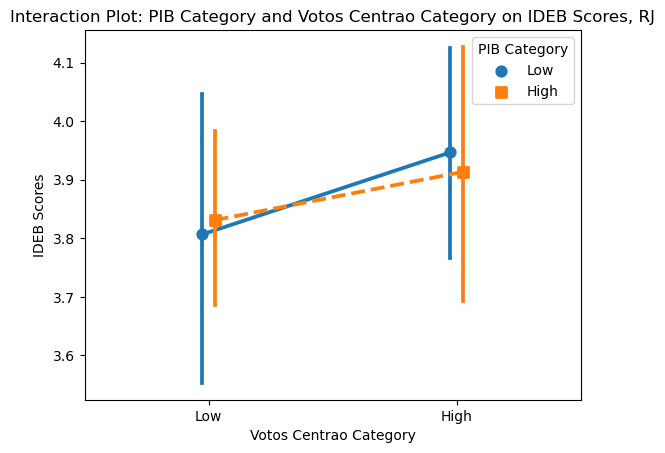

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


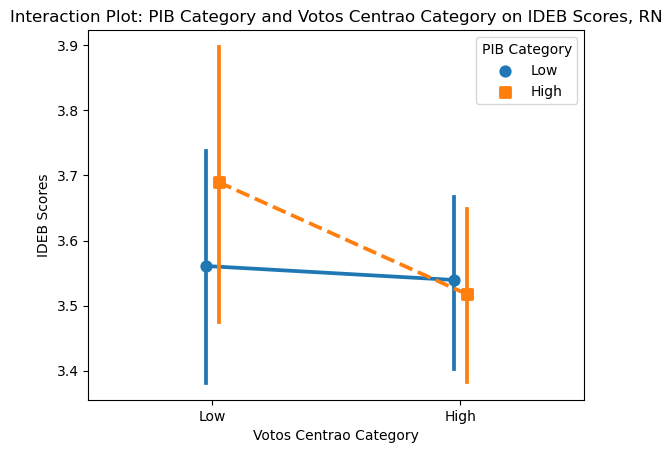

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


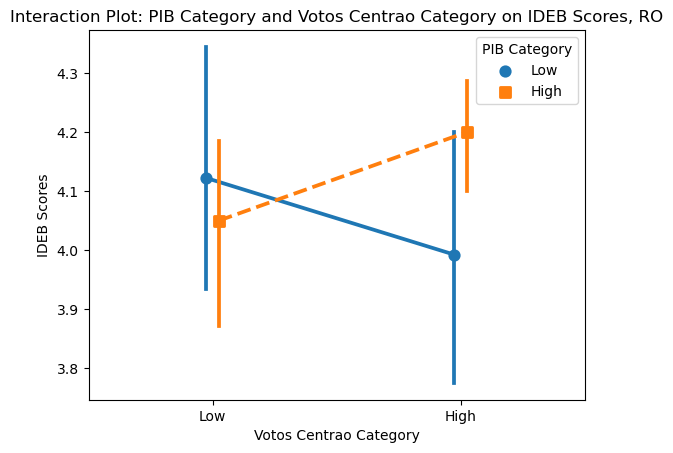

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


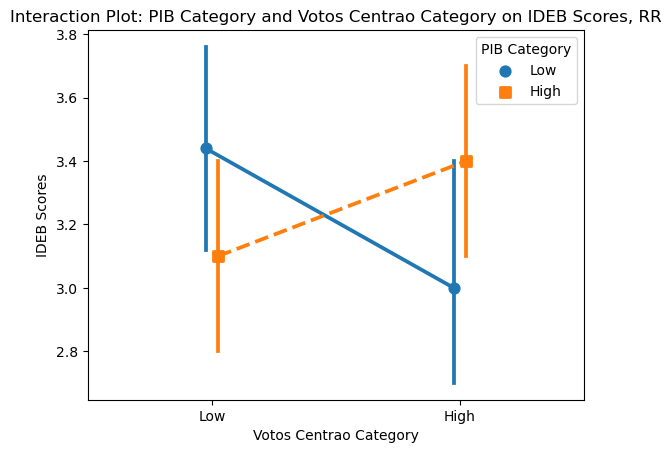

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


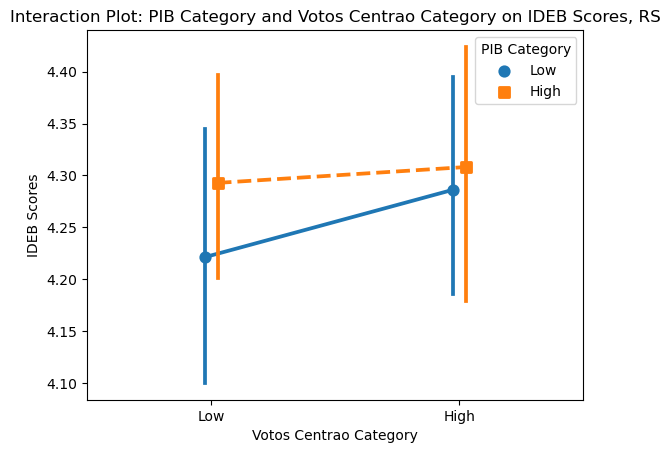

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


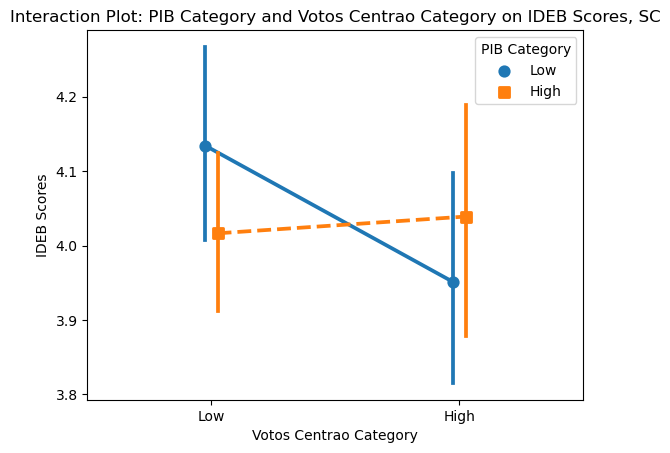

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


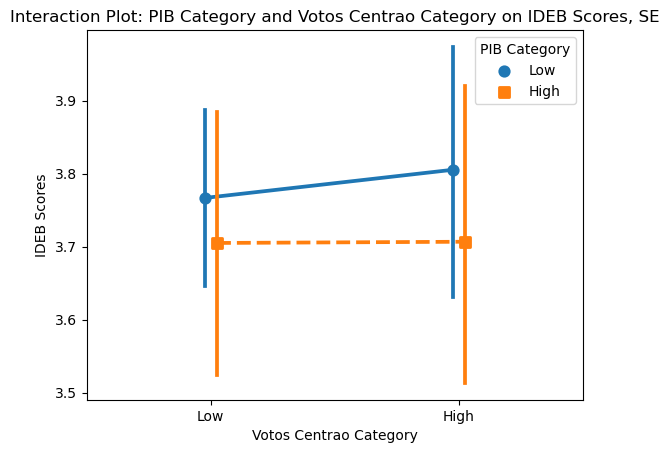

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


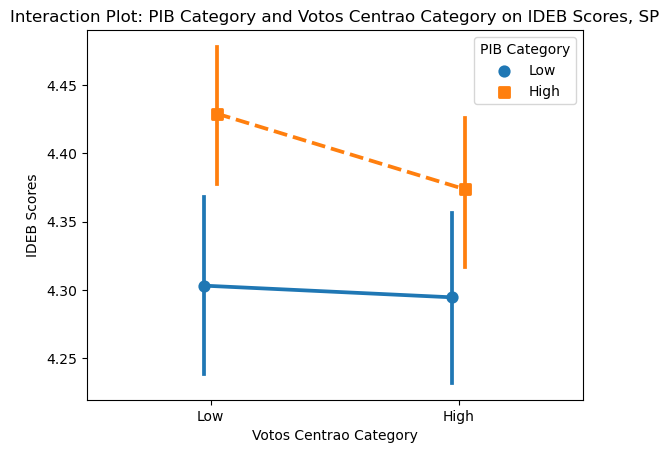

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


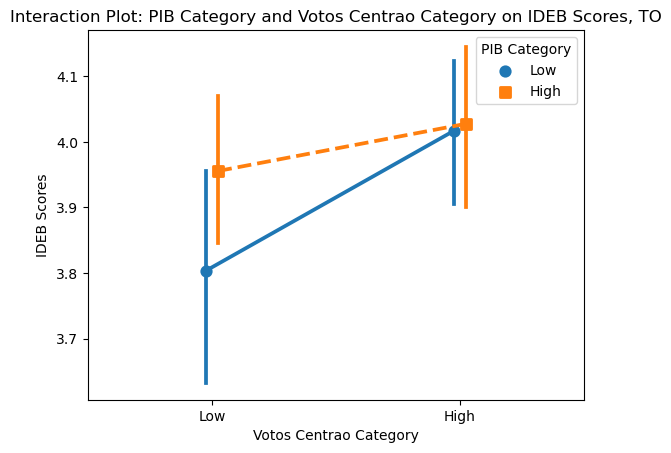

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

for i, data in merged_ideb.groupby("uf"):

# Create an interaction plot
    data['pib_category'] = pd.qcut(data['pib_per_capita'], q=2, labels=['Low', 'High'])
    data['votos_centrao_category'] = pd.qcut(data['percentage_votos_centrao'], q=2, labels=['Low', 'High'])
    sns.pointplot(data=data, x='votos_centrao_category', y='VL_OBSERVADO_2023', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
    plt.title(f'Interaction Plot: PIB Category and Votos Centrao Category on IDEB Scores, {i}')
    plt.xlabel('Votos Centrao Category')
    plt.ylabel('IDEB Scores')
    plt.legend(title='PIB Category')
    plt.show()

### SAEB

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


Text(0.5, 1.0, 'Distribution of SAEB 2023 for Different Levels of Percentage Votos Centrao')

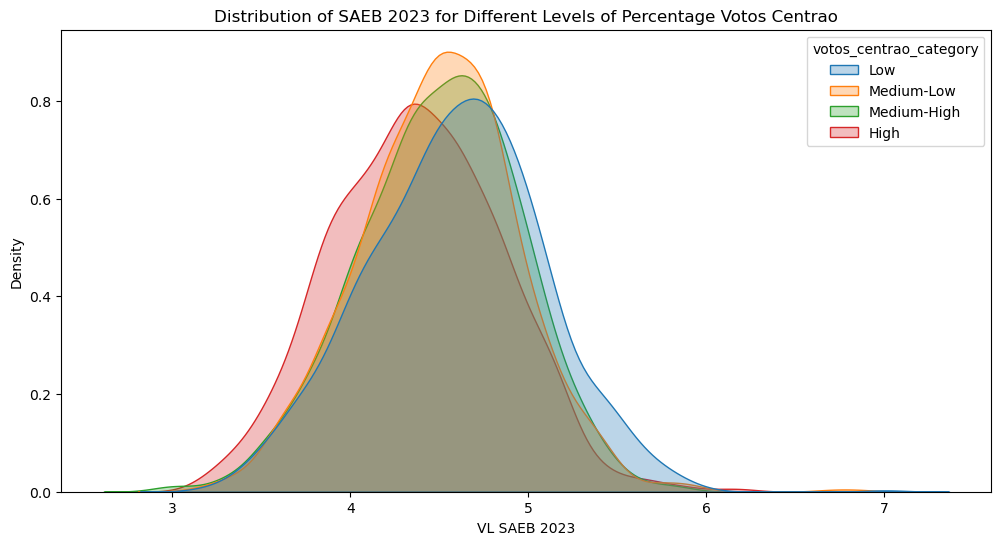

In [115]:

# Plot the distribution of IDEB for different levels of percentage votos centrao
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='VL_NOTA_MEDIA_2023', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL SAEB 2023')
plt.ylabel('Density')
plt.title('Distribution of SAEB 2023 for Different Levels of Percentage Votos Centrao')


In [116]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='VL_NOTA_MEDIA_2023', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

votos_centrao_category       Low  Medium-Low  Medium-High      High
pib_category                                                       
Low                     4.311974    4.247440     4.240015  4.217385
Medium-Low              4.425099    4.431572     4.444176  4.387176
Medium-High             4.701228    4.601911     4.610026  4.580115
High                    4.757409    4.644646     4.683631  4.642121


In [117]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('VL_NOTA_MEDIA_2023 ~ C(pib_category) + C(votos_centrao_category) + C(pib_category):C(votos_centrao_category)', data=merged_ideb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                               sum_sq      df           F  \
C(pib_category)                            133.042728     3.0  230.815289   
C(votos_centrao_category)                    5.978501     3.0   10.372078   
C(pib_category):C(votos_centrao_category)    1.633442     9.0    0.944617   
Residual                                   952.794901  4959.0         NaN   

                                                  PR(>F)  
C(pib_category)                            3.503276e-140  
C(votos_centrao_category)                   8.409714e-07  
C(pib_category):C(votos_centrao_category)   4.846198e-01  
Residual                                             NaN  


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


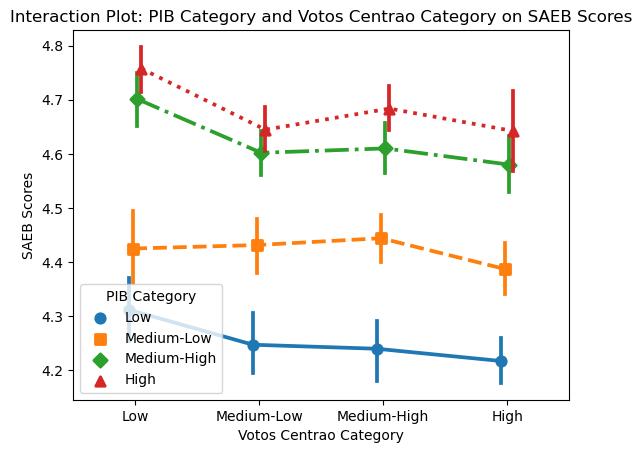

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='VL_NOTA_MEDIA_2023', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on SAEB Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('SAEB Scores')
plt.legend(title='PIB Category')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


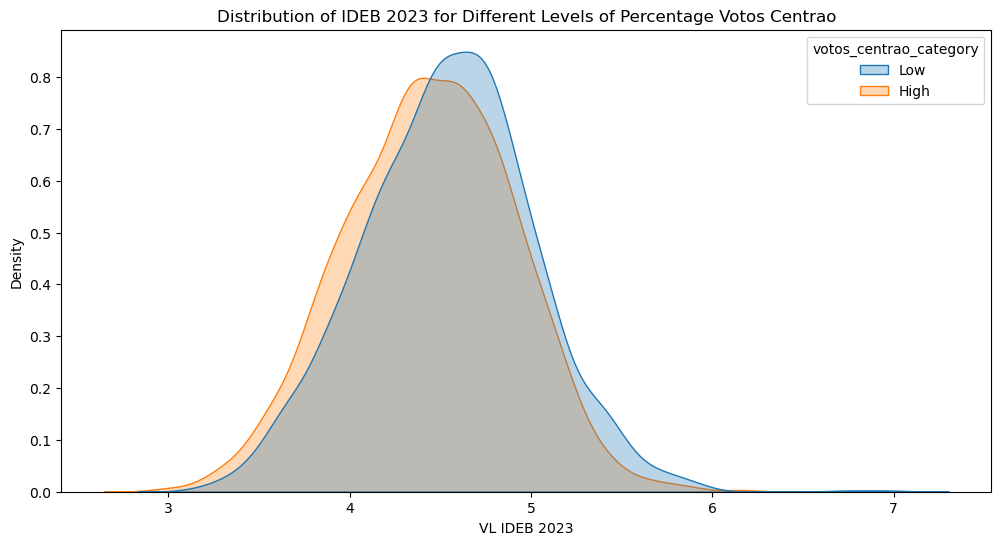

In [119]:
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='VL_NOTA_MEDIA_2023', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL IDEB 2023')
plt.ylabel('Density')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

In [120]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='VL_NOTA_MDEIA_2023', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

KeyError: 'VL_NOTA_MDEIA_2023'

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('VL_NOTA_MEDIA_2023 ~ C(pib_category) + C(votos_centrao_category) + C(pib_category):C(votos_centrao_category)', data=merged_ideb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                               sum_sq      df           F  \
C(pib_category)                            121.832257     1.0  617.630580   
C(votos_centrao_category)                    2.664860     1.0   13.509550   
C(pib_category):C(votos_centrao_category)    0.021286     1.0    0.107912   
Residual                                   980.566974  4971.0         NaN   

                                                  PR(>F)  
C(pib_category)                            1.302204e-128  
C(votos_centrao_category)                   2.398549e-04  
C(pib_category):C(votos_centrao_category)   7.425477e-01  
Residual                                             NaN  


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


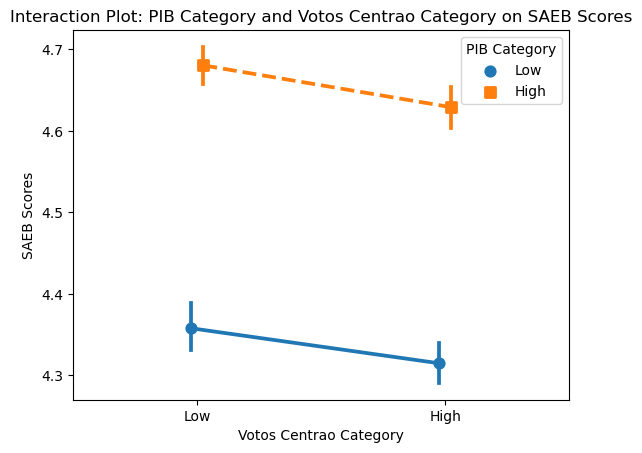

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='VL_NOTA_MEDIA_2023', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on SAEB Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('SAEB Scores')
plt.legend(title='PIB Category')
plt.show()

## IDEB Progression

In [21]:
merged_ideb['IDEB 2023/2017'] = merged_ideb['VL_OBSERVADO_2023']/merged_ideb['VL_OBSERVADO_2017']
merged_ideb['SAEB 2023/2017'] = merged_ideb['VL_NOTA_MEDIA_2023'] / merged_ideb['VL_NOTA_MEDIA_2017']
merged_ideb['IDEB 2023/2021'] = merged_ideb['VL_OBSERVADO_2023']/merged_ideb['VL_OBSERVADO_2021']
merged_ideb['SAEB 2023/2021'] = merged_ideb['VL_NOTA_MEDIA_2023'] / merged_ideb['VL_NOTA_MEDIA_2021']


In [22]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['IDEB 2023/2017'], nan_policy='omit')

print(f'Spearman correlation IDEB 2017: {corr}, p-value: {p_value}')

Spearman correlation IDEB 2017: 0.00980684959708505, p-value: 0.4974106570000797


In [23]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['IDEB 2023/2021'], nan_policy='omit')

print(f'Spearman correlation IDEB 2021: {corr}, p-value: {p_value}')

Spearman correlation IDEB 2021: 0.03191177133818619, p-value: 0.07143574947416013


In [24]:
from scipy.stats import spearmanr


# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['SAEB 2023/2017'], nan_policy='omit')

print(f'Spearman correlation SAEB: {corr}, p-value: {p_value}')

Spearman correlation SAEB: 0.050540825366592115, p-value: 0.0004665774803711875


In [25]:
# Calculate the Spearman correlation
corr, p_value = spearmanr(merged_ideb['percentage_votos_centrao'], merged_ideb['SAEB 2023/2021'], nan_policy='omit')

print(f'Spearman correlation SAEB 2021: {corr}, p-value: {p_value}')

Spearman correlation SAEB 2021: 0.07207183476366039, p-value: 4.5894855624042854e-05


In [26]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['IDEB 2023/2017'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
PA       -0.236437  0.005765
RJ        0.239376  0.025547
SC        0.185237  0.030230
ES        0.257184  0.030375
TO        0.187625  0.031216
RS        0.108689  0.048178
SP       -0.074625  0.069381
PE       -0.108471  0.146080
PR        0.067872  0.197614
PI        0.079414  0.260055
PB       -0.078549  0.267691
RO       -0.138566  0.369709
BA        0.044685  0.372743
AM       -0.094442  0.472902
CE        0.050609  0.496267
AL        0.068436  0.514524
MT        0.055159  0.559964
RR       -0.238095  0.570156
MS        0.069853  0.605627
GO       -0.032338  0.627914
RN        0.041982  0.660294
AP        0.136364  0.689309
MG       -0.009195  0.800459
SE        0.020788  0.866378
AC       -0.030992  0.902839
MA       -0.002921  0.966927


In [27]:
# Group by state and calculate the Spearman correlation for each state
state_correlations = merged_ideb.groupby('SG_UF').apply(lambda x: spearmanr(x['IDEB 2023/2021'], x['percentage_votos_centrao'], nan_policy='omit'))

# Convert the correlations to a DataFrame for easier sorting
state_correlations_df = pd.DataFrame(state_correlations.tolist(), index=state_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations sorted by the correlation coefficient
print(state_correlations_df.sort_values(by='p_value'))

       correlation   p_value
SG_UF                       
RJ        0.300383  0.005795
PA       -0.314349  0.009579
AL        0.160728  0.168345
PE       -0.100767  0.178320
SP        0.060880  0.181629
PB        0.147518  0.194499
CE        0.089022  0.232060
RS       -0.096508  0.241663
MG        0.034364  0.446016
AC       -0.311383  0.452799
TO       -0.098621  0.461414
MS       -0.140991  0.465685
ES       -0.076558  0.571377
SE       -0.072680  0.639180
MA       -0.033761  0.655523
PR        0.021324  0.689277
BA        0.037732  0.690210
SC       -0.036578  0.724897
RO       -0.055449  0.792357
MT        0.053373  0.808885
GO       -0.013610  0.846053
AP       -0.100000  0.872889
RN       -0.023953  0.891362
PI       -0.011903  0.900868
AM       -0.000371  0.997796
RR             NaN       NaN


In [28]:
# Group by state and calculate the Spearman correlation for each state
regiao_correlations = merged_ideb.groupby('regiao').apply(lambda x: spearmanr(x['SAEB 2023/2017'], x['percentage_votos_centrao'], nan_policy='omit'))

regiaos_correlations_df = pd.DataFrame(regiao_correlations.tolist(), index=regiao_correlations.index, columns=['correlation', 'p_value'])

# Display the correlations
print(round(regiaos_correlations_df, 3))

              correlation  p_value
regiao                            
Centro-oeste        0.082    0.101
Nordeste           -0.015    0.556
Norte               0.004    0.933
Sudeste             0.011    0.664
Sul                 0.249    0.000


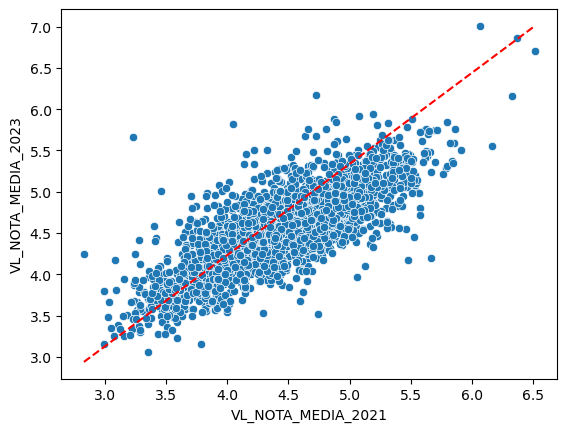

In [29]:
import seaborn as sns

sns.scatterplot(x=merged_ideb['VL_NOTA_MEDIA_2021'], y=merged_ideb['VL_NOTA_MEDIA_2023'])
plt.plot([merged_ideb['VL_NOTA_MEDIA_2021'].min(), merged_ideb['VL_NOTA_MEDIA_2021'].max()], 
         [merged_ideb['VL_NOTA_MEDIA_2023'].min(), merged_ideb['VL_NOTA_MEDIA_2023'].max()], 
         color='red', linestyle='--')
plt.show()

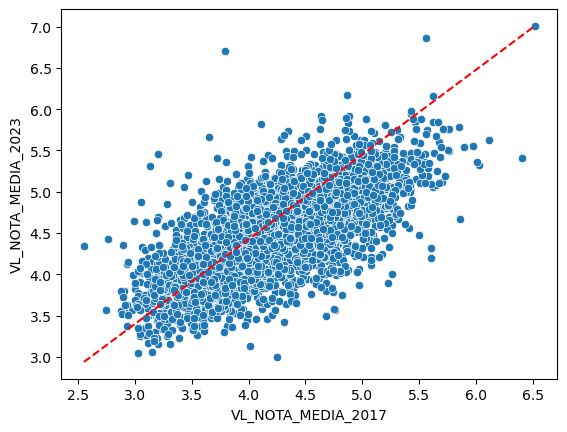

In [30]:
import seaborn as sns

sns.scatterplot(x=merged_ideb['VL_NOTA_MEDIA_2017'], y=merged_ideb['VL_NOTA_MEDIA_2023'])
plt.plot([merged_ideb['VL_NOTA_MEDIA_2017'].min(), merged_ideb['VL_NOTA_MEDIA_2017'].max()], 
         [merged_ideb['VL_NOTA_MEDIA_2023'].min(), merged_ideb['VL_NOTA_MEDIA_2023'].max()], 
         color='red', linestyle='--')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


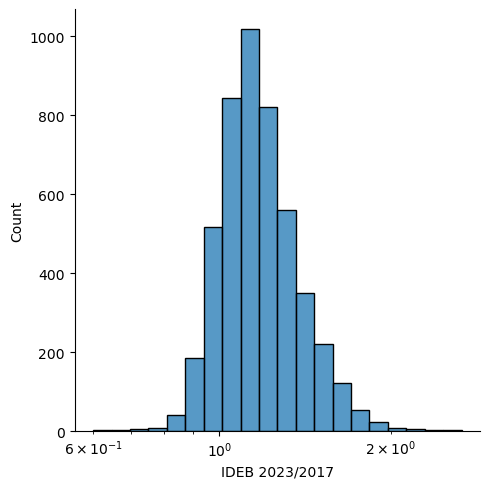

In [31]:
sns.displot(merged_ideb['IDEB 2023/2017'], bins=20, kde=False, log_scale=True)

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


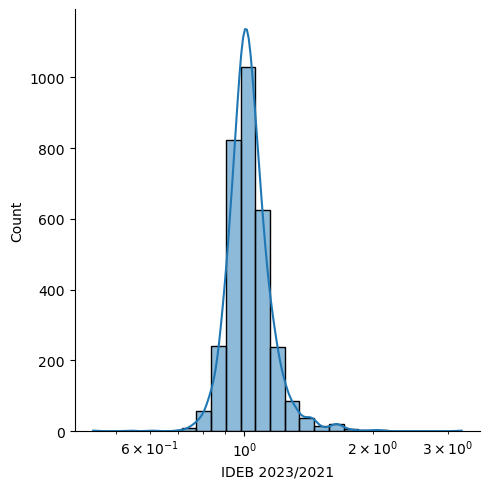

In [32]:
sns.displot(merged_ideb['IDEB 2023/2021'], bins=25, kde=True, log_scale=True)

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


Text(0.5, 1.0, 'Distribution of Progress 2023/2021 for Different Levels of Percentage Votos Centrao')

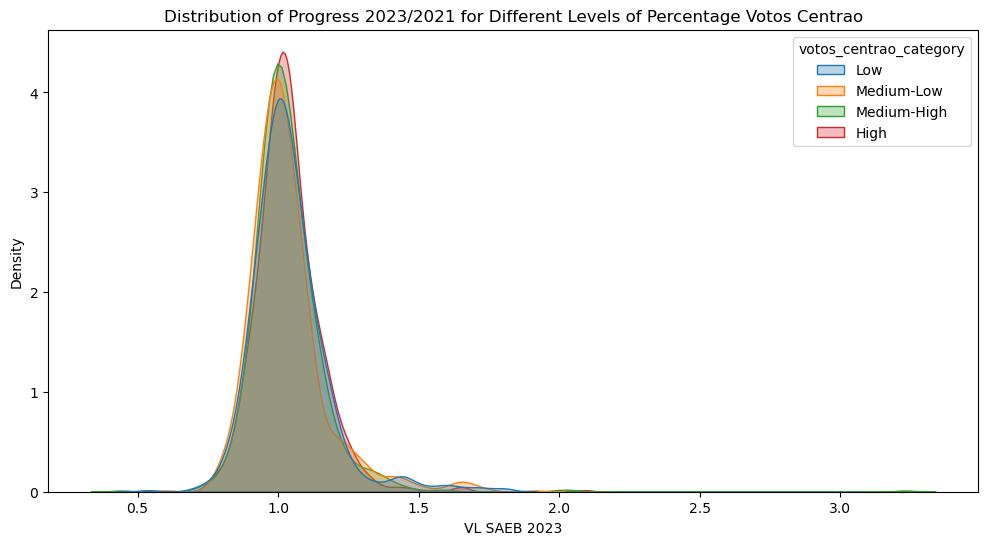

In [33]:

# Plot the distribution of IDEB for different levels of percentage votos centrao
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='IDEB 2023/2021', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL SAEB 2023')
plt.ylabel('Density')
plt.title('Distribution of Progress 2023/2021 for Different Levels of Percentage Votos Centrao')

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=4, labels=['Low','Medium-Low', 'Medium-High', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='IDEB 2023/2021', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

votos_centrao_category       Low  Medium-Low  Medium-High      High
pib_category                                                       
Low                     1.087606    1.086421     1.060204  1.044490
Medium-Low              1.048682    1.049391     1.041637  1.017502
Medium-High             1.035565    1.018899     1.017424  1.034462
High                    1.004093    0.993701     1.020041  1.052525


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


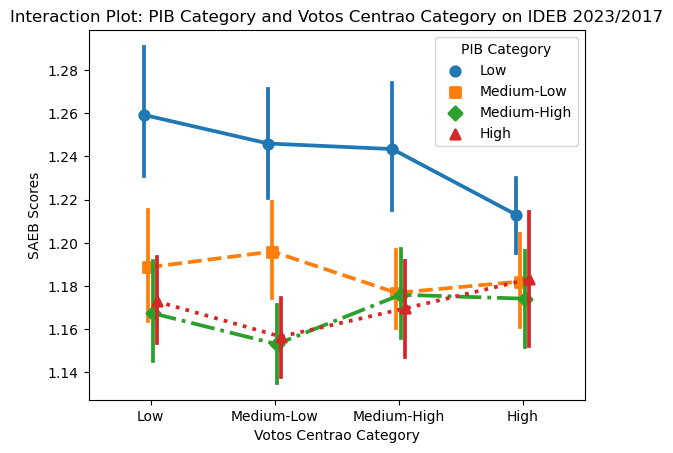

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='IDEB 2023/2017', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on IDEB 2023/2017')
plt.xlabel('Votos Centrao Category')
plt.ylabel('IDEB 2023/2017 Scores')
plt.legend(title='PIB Category')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


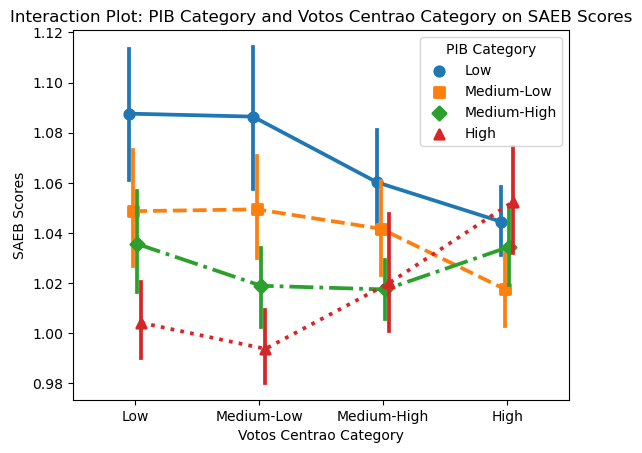

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='IDEB 2023/2021', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on SAEB Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('SAEB Scores')
plt.legend(title='PIB Category')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


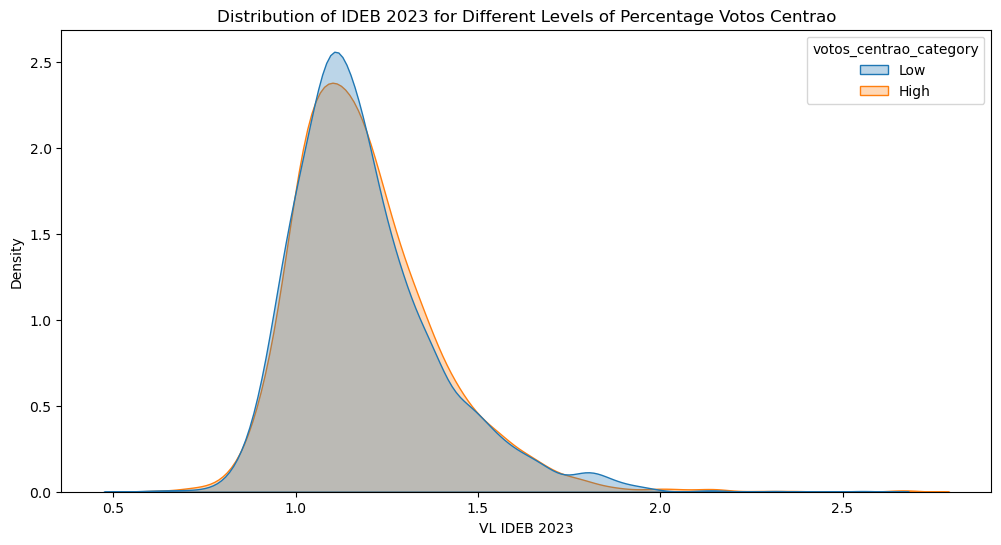

In [37]:
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='IDEB 2023/2017', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL IDEB 2023')
plt.ylabel('Density')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Programming\envs\Questions\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


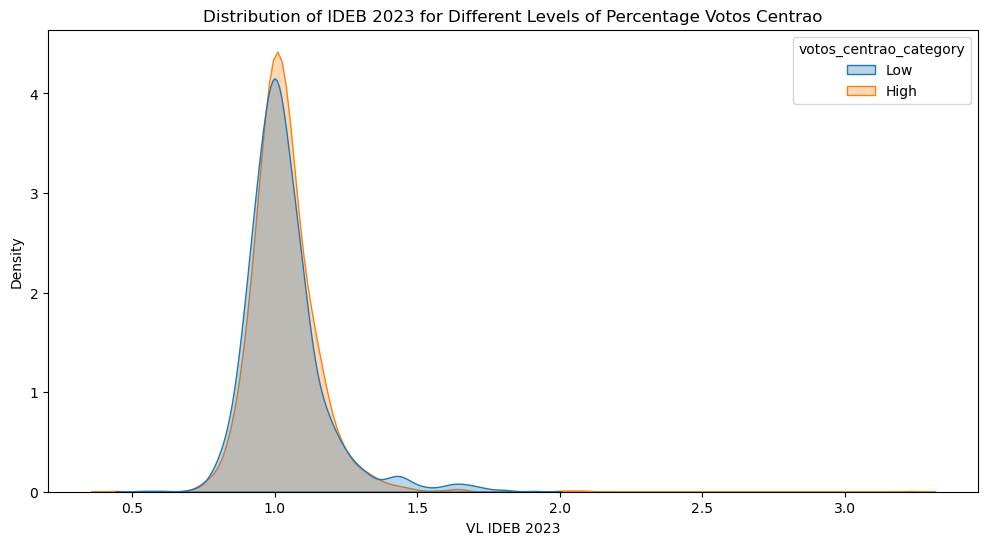

In [38]:
merged_ideb['votos_centrao_category'] = pd.qcut(merged_ideb['percentage_votos_centrao'], q=2, labels=['Low', 'High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
plt.figure(figsize=(12, 6))
sns.kdeplot(data=merged_ideb, x='IDEB 2023/2021', hue='votos_centrao_category', common_norm=False, fill=True, alpha=0.3)
plt.xlabel('VL IDEB 2023')
plt.ylabel('Density')
plt.title('Distribution of IDEB 2023 for Different Levels of Percentage Votos Centrao')
plt.show()

In [39]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a new column for categorizing percentage votos centrao
merged_ideb['pib_category'] = pd.qcut(merged_ideb['pib_per_capita'], q=2, labels=['Low','High'])

# Plot the distribution of IDEB for different levels of percentage votos centrao
# Create a pivot table to show the mean IDEB for different PIB categories and percentage votos centrao categories
pivot_table = merged_ideb.pivot_table(values='IDEB 2023/2017', index='pib_category', columns='votos_centrao_category', aggfunc='mean')

# Display the pivot table
print(pivot_table)

votos_centrao_category       Low      High
pib_category                              
Low                     1.221119  1.202601
High                    1.162825  1.174872


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


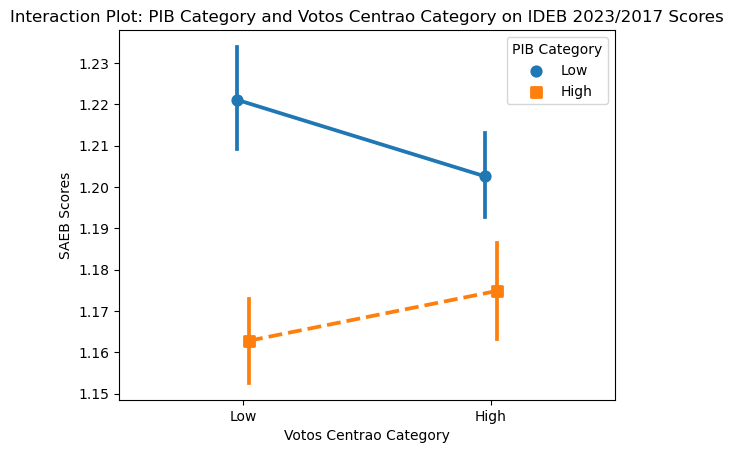

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interaction plot
sns.pointplot(data=merged_ideb, x='votos_centrao_category', y='IDEB 2023/2017', hue='pib_category', dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
plt.title('Interaction Plot: PIB Category and Votos Centrao Category on IDEB 2023/2017 Scores')
plt.xlabel('Votos Centrao Category')
plt.ylabel('SAEB Scores')
plt.legend(title='PIB Category')
plt.show()

In [42]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = "BR_Municipios_2022/BR_Municipios_2022.shp"
gdf = gpd.read_file(shapefile_path)

shape_uf = "BR_UF_2022/BR_UF_2022.shp"
gdf_uf = gpd.read_file(shape_uf)


# Merge the shapefile with the merged dataframe
gdf['CD_MUN'] = gdf['CD_MUN'].astype(int)


In [43]:
gdf = gdf.merge(merged_ideb, left_on="CD_MUN", right_on="ibge")

In [44]:
gdf.describe(include='all')

CD_MUN        NM_MUN SIGLA_UF       AREA_KM2  \
count      5459.0          5459     5459    5459.000000   
unique     5459.0          5188       26            NaN   
top     1100023.0  São Domingos       MG            NaN   
freq          1.0             5      835            NaN   
mean          NaN           NaN      NaN    1538.364532   
std           NaN           NaN      NaN    5656.410212   
min           NaN           NaN      NaN       3.565000   
25%           NaN           NaN      NaN     205.517000   
50%           NaN           NaN      NaN     420.604000   
75%           NaN           NaN      NaN    1031.462000   
max           NaN           NaN      NaN  159533.306000   

                                                 geometry   Unnamed: 0  \
count                                                5459  5459.000000   
unique                                               5459          NaN   
top     POLYGON ((-63.179325881 -10.139244048, -63.177...          NaN   
freq                                                    1          NaN   
mean                                                  NaN  2735.287782   
std                                                   NaN  1578.965429   
min                                                   NaN     0.000000   
25%                                                   NaN  1367.500000   
50%                                                   NaN  2736.000000   
75%                                                   NaN  4101.500000   
max                                                   NaN  5469.000000   

          regiao       ibge     municipio  pib_per_capita  ...  \
count       5459     5459.0          5459     5459.000000  ...   
unique         5     5459.0          5188             NaN  ...   
top     Nordeste  1100023.0  SÃO DOMINGOS             NaN  ...   
freq        1762        1.0             5             NaN  ...   
mean         NaN        NaN           NaN    33867.419962  ...   
std          NaN        NaN           NaN    42098.114447  ...   
min          NaN        NaN           NaN     5407.660000  ...   
25%          NaN        NaN           NaN    12785.650000  ...   
50%          NaN        NaN           NaN    23306.180000  ...   
75%          NaN        NaN           NaN    40868.055000  ...   
max          NaN        NaN           NaN   920833.970000  ...   

       VL_OBSERVADO_2017 VL_NOTA_MEDIA_2021  VL_NOTA_MEDIA_2019  \
count        5185.000000        3321.000000         4690.000000   
unique               NaN                NaN                 NaN   
top                  NaN                NaN                 NaN   
freq                 NaN                NaN                 NaN   
mean            3.568756           4.475890            4.590452   
std             0.651805           0.511250            0.551598   
min             1.500000           2.827480            2.236053   
25%             3.100000           4.133222            4.211802   
50%             3.600000           4.502789            4.627772   
75%             4.000000           4.829977            4.980503   
max             5.700000           6.515290            6.981192   

        VL_NOTA_MEDIA_2017  IDEB 2023/2017  SAEB 2023/2017  IDEB 2023/2021  \
count          5185.000000     4790.000000     4790.000000     3192.000000   
unique                 NaN             NaN             NaN             NaN   
top                    NaN             NaN             NaN             NaN   
freq                   NaN             NaN             NaN             NaN   
mean              4.256846        1.189907        1.061923        1.034761   
std               0.542918        0.199341        0.100747        0.135335   
min               2.555209        0.600000        0.704651        0.441860   
25%               3.862733        1.054054        0.997414        0.957447   
50%               4.274453        1.153846        1.051684        1.021739   
75%               4.637119        1

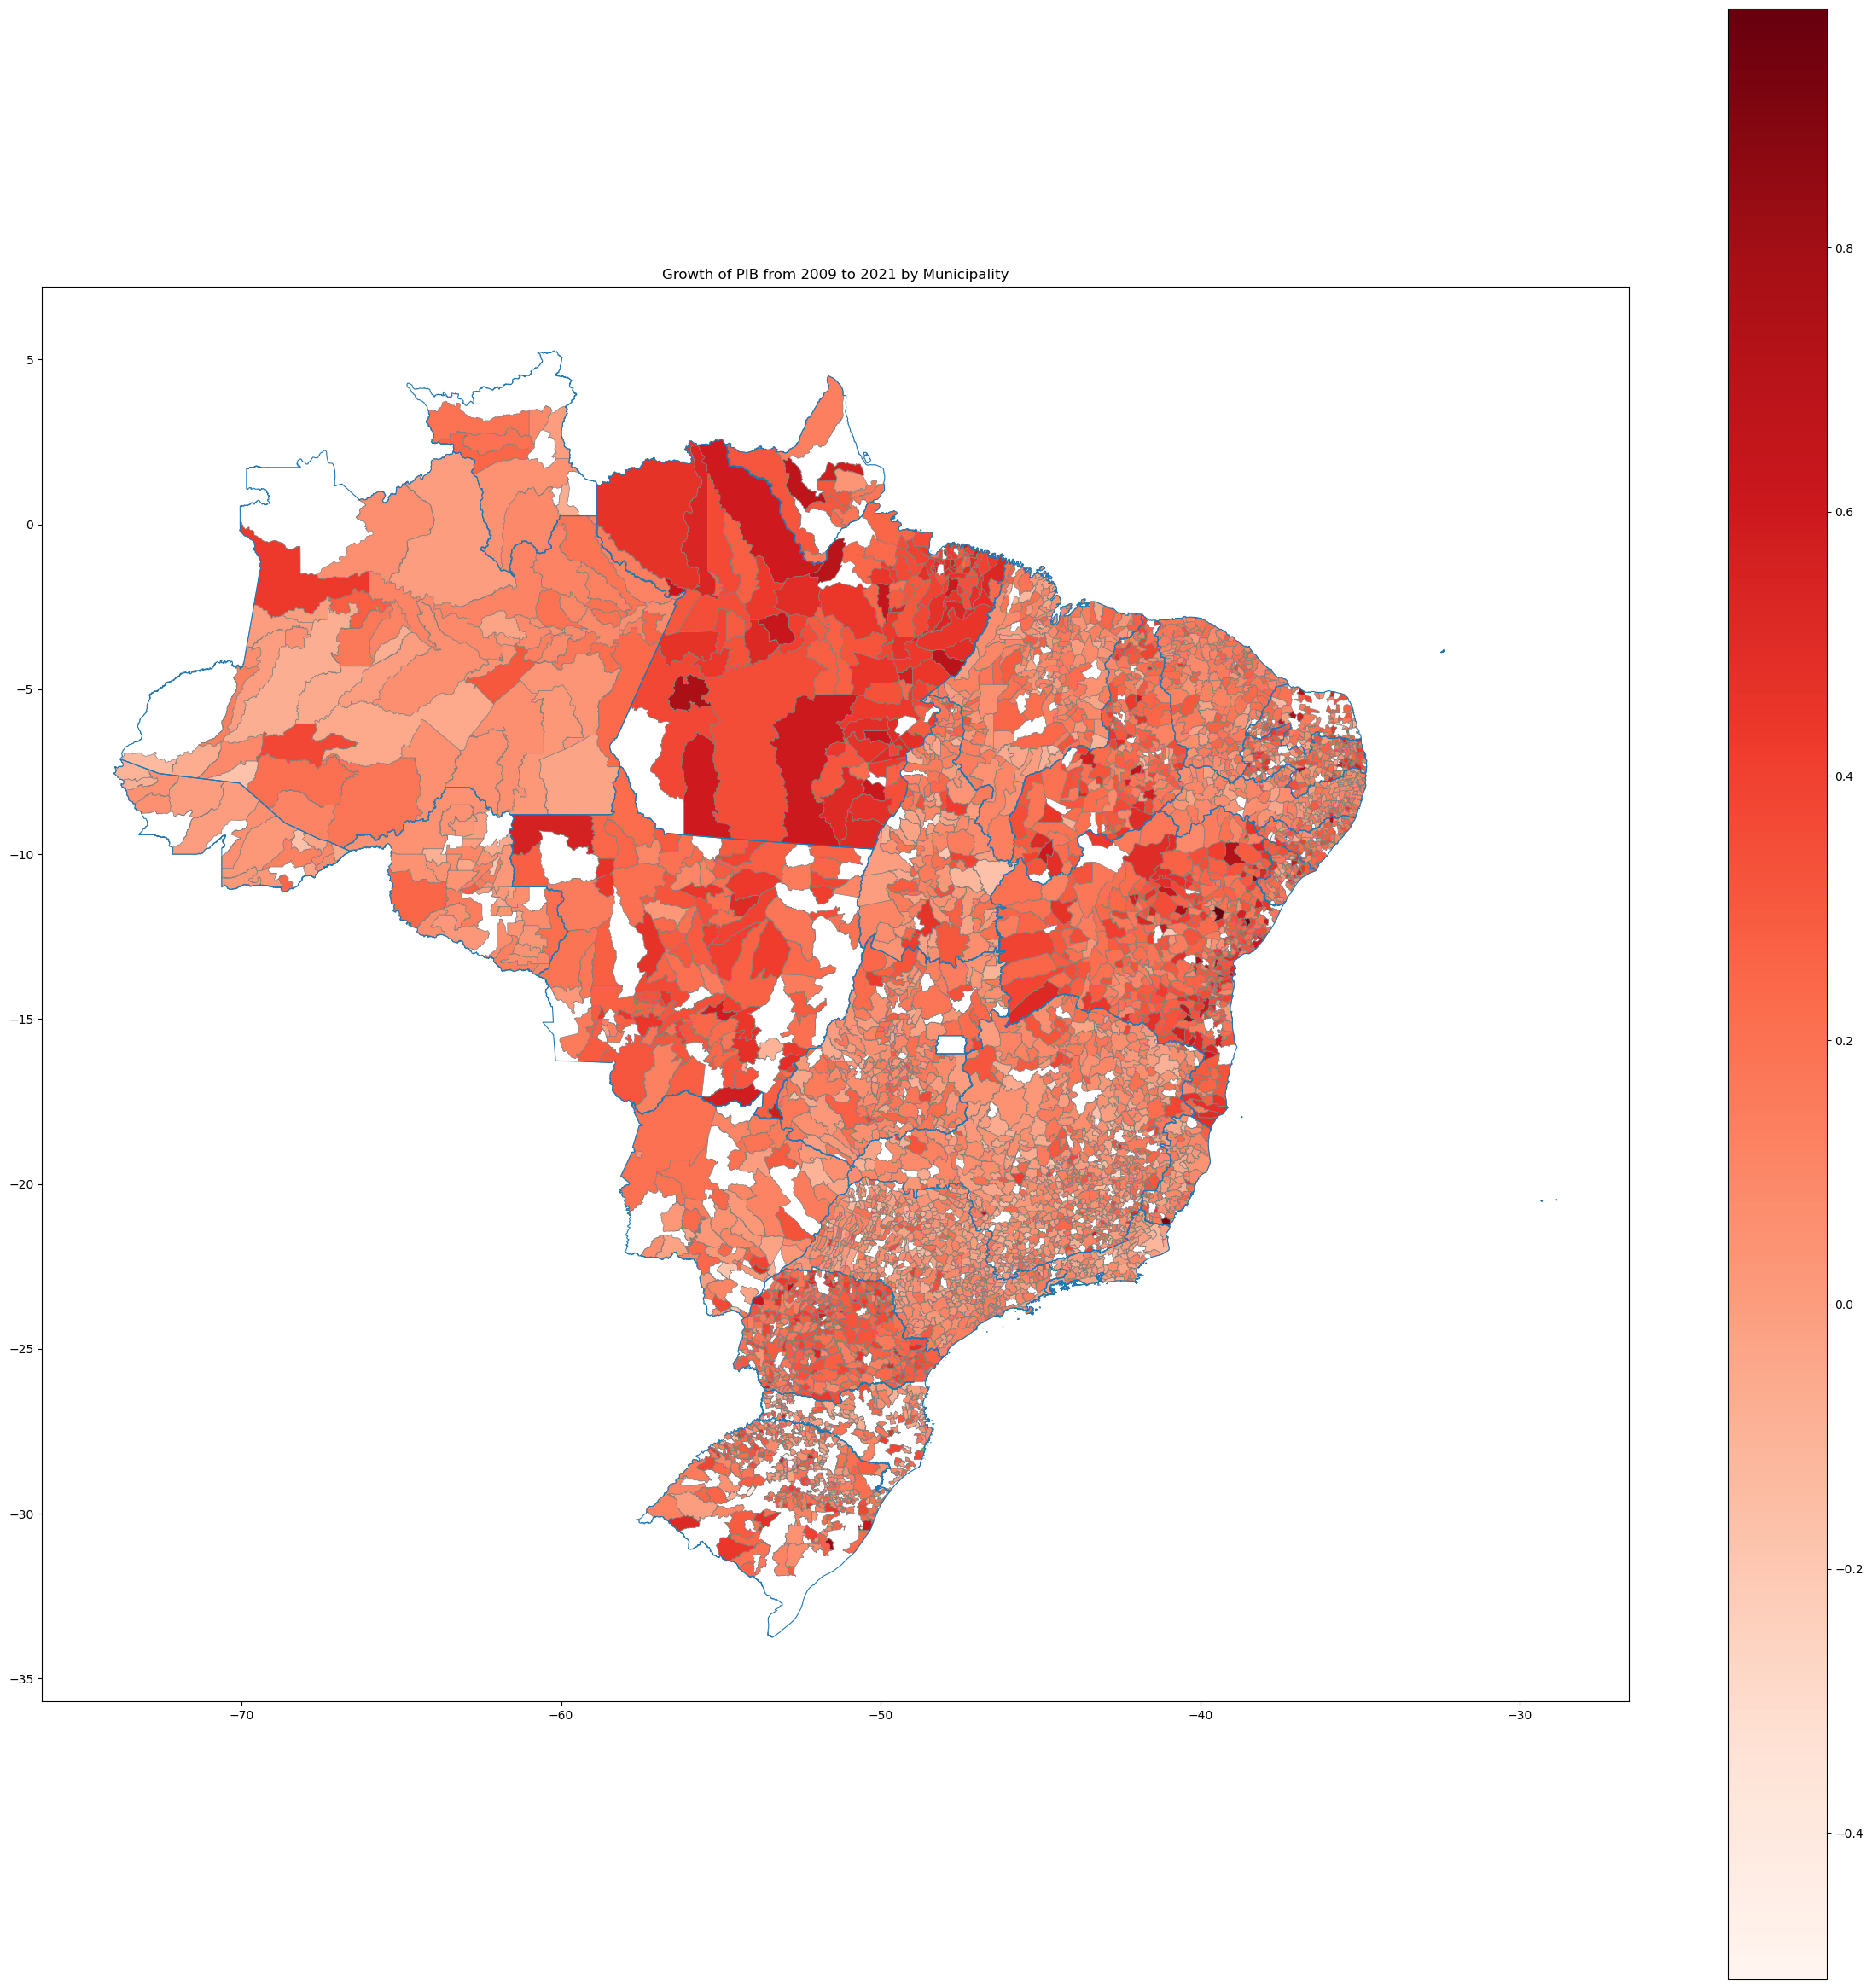

In [45]:

gdf['log IDEB ratio'] = np.log(gdf['IDEB 2023/2017'])
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
gdf.plot(column='log IDEB ratio', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
gdf_uf.boundary.plot(ax=ax, linewidth=0.8)
plt.title('Growth of PIB from 2009 to 2021 by Municipality')
plt.show()

# Variaveis Orlando

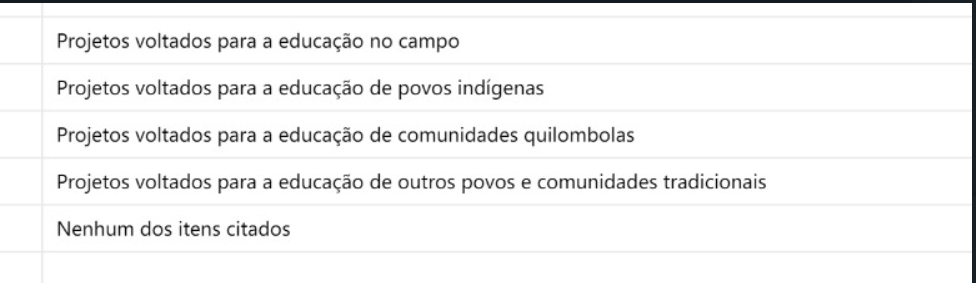

In [46]:
merged_ideb['ibge'] = merged_ideb['ibge'].astype('int')

MEDU131
MEDU132
MEDU133
MEDU134
MEDU135

Melhorias acessibilidade; Criação e manutenção; formação de docentes; adequação idade; alfabetização idade certa
MEDU111                     MEDU112                 MEDU117                 MEDU1111    MEDU1112

In [47]:
educacao_dados = pd.read_excel("Base_MUNIC_2021_20240425.xlsx", sheet_name="Educação")

In [48]:
educacao_dados.columns

Index(['CodMun', 'UF', 'Cod UF', 'Mun', 'Pop', 'Faixa_pop', 'Regiao', 'Medu01',
       'Medu03', 'Medu04',
       ...
       'Medu49213', 'Medu49214', 'Medu501', 'Medu502', 'Medu503', 'Medu504',
       'Medu51', 'Medu52', 'Medu521', 'Medu522'],
      dtype='object', length=200)

In [75]:
educacao_dados_to_study = educacao_dados[['CodMun','Medu131','Medu132','Medu133','Medu134','Medu135','Medu111','Medu112','Medu117','Medu1111','Medu1112']]

In [76]:
educacao_dados_to_study = educacao_dados_to_study.replace({'Sim': 1, 'Não': 0, "-":np.nan, "Recusa":np.nan, "Não informou":np.nan})

In [77]:
educacao_dados_to_study['sum'] = educacao_dados_to_study.iloc[:, 2:].sum(axis=1)

In [80]:
educacao_dados_to_study.describe()

CodMun     EduCampo     EduIndio  EduQuilombo      EduTrad  \
count  5.570000e+03  3228.000000  3228.000000  3228.000000  3228.000000   
mean   3.253591e+06     0.803594     0.101921     0.170694     0.302045   
std    9.849103e+05     0.397341     0.302591     0.376300     0.459216   
min    1.100015e+06     0.000000     0.000000     0.000000     0.000000   
25%    2.512126e+06     1.000000     0.000000     0.000000     0.000000   
50%    3.146280e+06     1.000000     0.000000     0.000000     0.000000   
75%    4.119190e+06     1.000000     0.000000     0.000000     1.000000   
max    5.300108e+06     1.000000     1.000000     1.000000     1.000000   

       Nenhum  Acessibilidade   Manutencao  FormDocente  Idade Adequa  \
count  2338.0     5557.000000  5557.000000  5557.000000   5557.000000   
mean      1.0        0.475436     0.111211     0.042289      0.074681   
std       0.0        0.499441     0.314422     0.201266      0.262899   
min       1.0        0.000000     0.000000     0.000000      0.000000   
25%       1.0        0.000000     0.000000     0.000000      0.000000   
50%       1.0        0.000000     0.000000     0.000000      0.000000   
75%       1.0        1.000000     0.000000     0.000000      0.000000   
max       1.0        1.000000     1.000000     1.000000      1.000000   

       Alfabe Idade          sum  
count   5557.000000  5570.000000  
mean       0.283066     1.737163  
std        0.450529     0.874737  
min        0.000000     0.000000  
25%        0.000000     1.000000  
50%        0.000000     2.000000  
75%        1.000000     2.000000  
max        1.000000     5.000000

In [62]:
educacao_dados_to_study.isna().sum()

CodMun               0
EduCampo          2342
EduIndio          2342
EduQuilombo       2342
EduTrad           2342
Nenhum            3232
Acessibilidade      13
Manutencao          13
FormDocente         13
Idade Adequa        13
Alfabe Idade        13
dtype: int64

In [78]:
educacao_dados_to_study.rename(columns={'Medu131':'EduCampo', 'Medu132':'EduIndio',"Medu133":'EduQuilombo',"Medu134":'EduTrad',"Medu135":'Nenhum',"Medu111":'Acessibilidade',"Medu112":'Manutencao','Medu117':'FormDocente',"Medu1111":"Idade Adequa","Medu1112":"Alfabe Idade"}, inplace=True)

In [53]:
merged_ideb_extra = merged_ideb.merge(educacao_dados_to_study, left_on='ibge', right_on='CodMun')

In [54]:
merged_ideb_extra.drop(columns='Unnamed: 0', inplace=True)

In [55]:
merged_ideb_extra

regiao     ibge          municipio  pib_per_capita  uf  \
0            Norte  1100023          ARIQUEMES        28878.27  RO   
1            Norte  1100031             CABIXI        47051.83  RO   
2            Norte  1100049             CACOAL        32313.26  RO   
3            Norte  1100056         CEREJEIRAS        46185.81  RO   
4            Norte  1100064  COLORADO DO OESTE        27923.92  RO   
...            ...      ...                ...             ...  ..   
5454  Centro-oeste  5221908             VARJÃO        27309.69  GO   
5455  Centro-oeste  5222005         VIANÓPOLIS        60900.61  GO   
5456  Centro-oeste  5222054     VICENTINÓPOLIS        53340.72  GO   
5457  Centro-oeste  5222203           VILA BOA        27886.97  GO   
5458  Centro-oeste  5222302      VILA PROPÍCIO        51845.31  GO   

                                                    vab    Impostos  \
0                                       Demais serviços  420195.360   
1     Agricultura, inclusive apoio à agricultura e a...   11192.685   
2                                       Demais serviços  384606.648   
3     Comércio e reparação de veículos automotores e...  131903.932   
4     Administração, defesa, educação e saúde públic...   33010.713   
...                                                 ...         ...   
5454               Pecuária, inclusive apoio à pecuária    5086.984   
5455  Agricultura, inclusive apoio à agricultura e a...   66056.200   
5456  Agricultura, inclusive apoio à agricultura e a...   31899.784   
5457  Agricultura, inclusive apoio à agricultura e a...   14192.317   
5458  Agricultura, inclusive apoio à agricultura e a...   12864.747   

          populacao  taxa_analfabetismo  percentage_votos_centrao  ...  \
0     111147.980852              0.0592                  0.717709  ...   
1       5067.000115              0.1018                  0.242193  ...   
2      86416.002626              0.0629                  0.076832  ...   
3      16088.001401              0.0785                  0.117895  ...   
4      15213.000324              0.0953                  0.315554  ...   
...             ...                 ...                       ...  ...   
5454    3848.000362              0.1116                  0.614519  ...   
5455   14088.000826              0.0655                  0.719274  ...   
5456    9001.999654              0.0913                  0.591141  ...   
5457    6450.999517              0.1283                  0.263485  ...   
5458    5941.000314              0.1432                  0.585609  ...   

      EduCampo  EduIndio  EduQuilombo  EduTrad  Nenhum  Acessibilidade  \
0          1.0       0.0          0.0      0.0     NaN             0.0   
1          1.0       0.0          0.0      1.0     NaN             1.0   
2          1.0       0.0          0.0      0.0     NaN             0.0   
3          NaN       NaN          NaN      NaN     1.0             0.0   
4          1.0       0.0          0.0      0.0     NaN             1.0   
...        ...       ...          ...      ...     ...             ...   
5454       1.0       0.0          0.0      1.0     NaN             1.0   
5455       1.0       0.0          0.0      0.0     NaN             1.0   
5456       NaN       NaN          NaN      NaN     1.0             0.0   
5457       NaN       NaN          NaN      NaN     1.0             1.0   
5458       NaN       NaN          NaN      NaN     1.0             0.0   

      Manutencao  FormDocente  Idade Adequa  Alfabe Idade  
0            0.0          0.0           0.0           1.0  
1            0.0          0.0           0.0           0.0  
2            0.0          0.0           0.0           0.0  
3            1.0          0.0           0.0           1.0  
4            0.0          1.0           0.0           0.0  
...          ...          ...           ...           ...  
5454         0.0          0.0           0.0           0.0  
5455         0.0          0.0           0.0           0.0  


In [56]:

for i in merged_ideb_extra.iloc[:, -10:-1]:
    print(i,spearmanr(merged_ideb_extra[str(i)], merged_ideb_extra['VL_OBSERVADO_2023'], nan_policy='omit'))

EduCampo SignificanceResult(statistic=-0.03471877840996594, pvalue=0.061162065320936855)
EduIndio SignificanceResult(statistic=-0.08490715114327216, pvalue=4.522641308824076e-06)
EduQuilombo SignificanceResult(statistic=-0.14787477801648027, pvalue=1.089540297066818e-15)
EduTrad SignificanceResult(statistic=0.05262988823389762, pvalue=0.004520574757213752)
Nenhum SignificanceResult(statistic=0.0, pvalue=1.0)
Acessibilidade SignificanceResult(statistic=-0.014957240789075904, pvalue=0.292058850068848)
Manutencao SignificanceResult(statistic=-0.021774125316850506, pvalue=0.12505281623934966)
FormDocente SignificanceResult(statistic=-0.030565864231044695, pvalue=0.031279489319389335)
Idade Adequa SignificanceResult(statistic=-0.0360638384117361, pvalue=0.011050804252568417)


c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


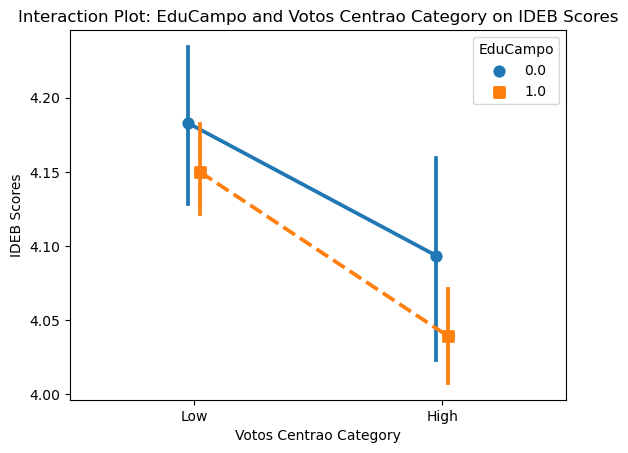

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


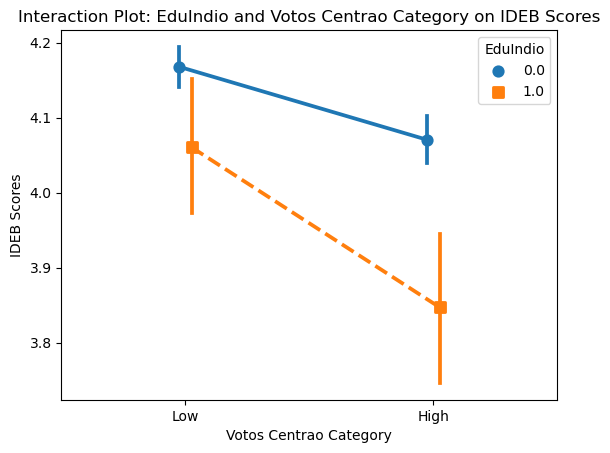

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


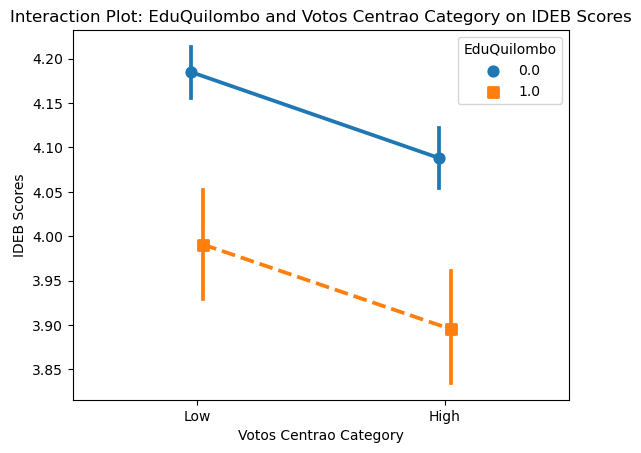

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


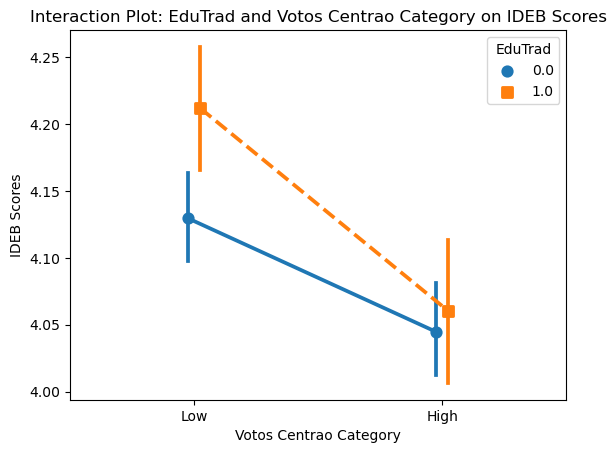

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


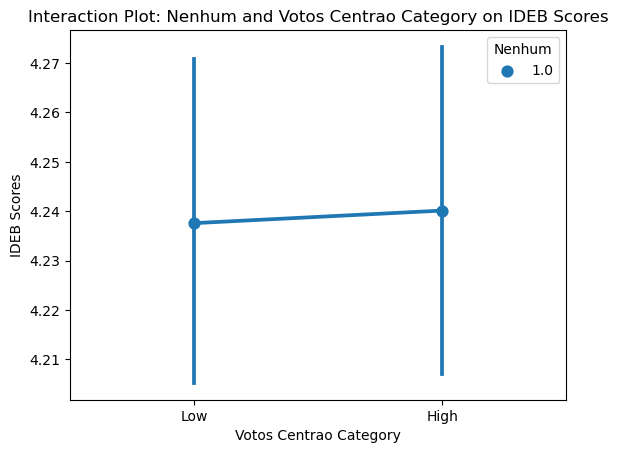

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


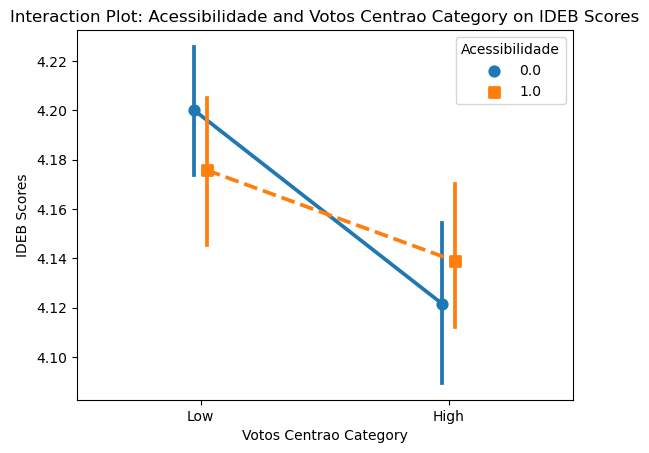

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


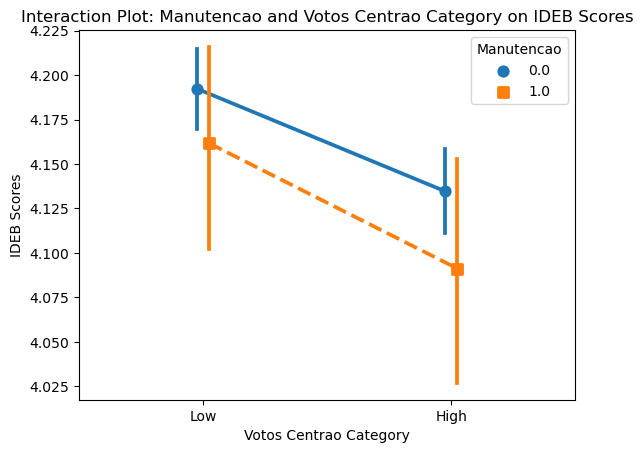

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


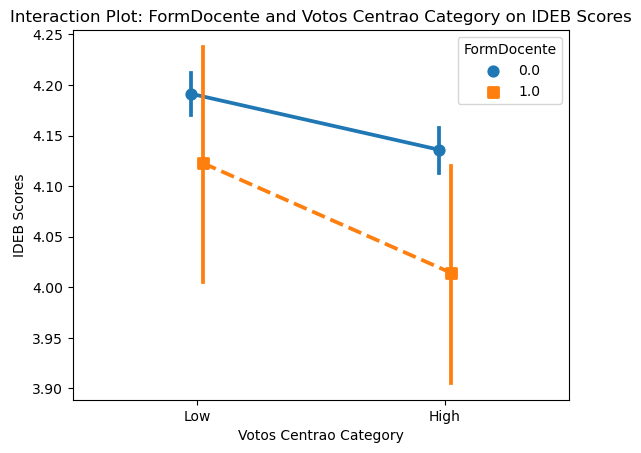

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


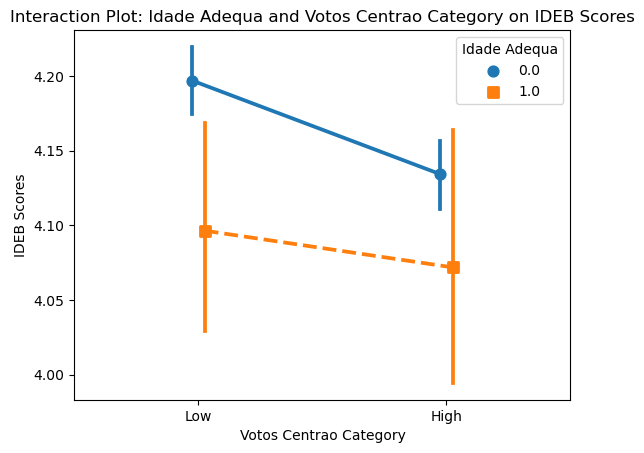

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
merged_ideb_extra['votos_centrao_category'] = pd.qcut(merged_ideb_extra['percentage_votos_centrao'], q=2, labels=['Low', 'High'])
merged_ideb_extra['pib_category'] = pd.qcut(merged_ideb_extra['pib_per_capita'], q=2, labels=['Low', 'High'])

for i in merged_ideb_extra.iloc[:, -10:-1]:
# Create an interaction plot
    sns.pointplot(data=merged_ideb_extra, x='votos_centrao_category', y='VL_OBSERVADO_2023', hue=str(i), dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
    plt.title(f'Interaction Plot: {i} and Votos Centrao Category on IDEB Scores')
    plt.xlabel('Votos Centrao Category')
    plt.ylabel('IDEB Scores')
    plt.legend(title=i)
    plt.show()

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


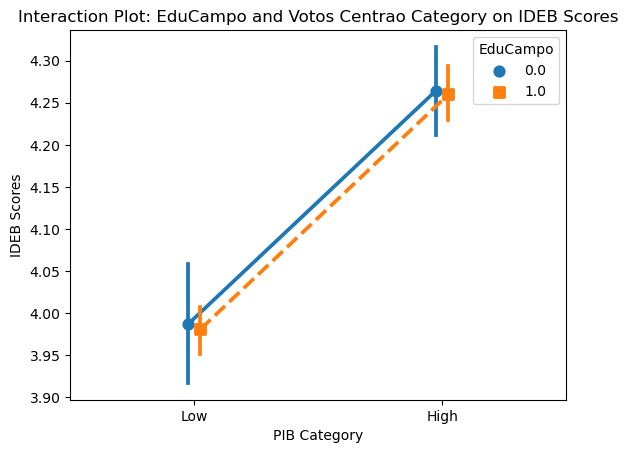

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


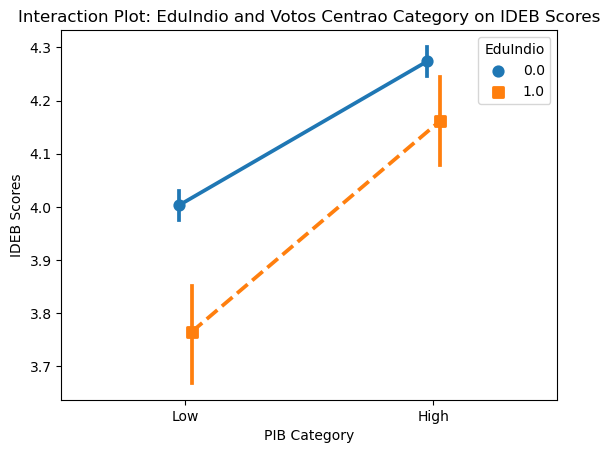

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


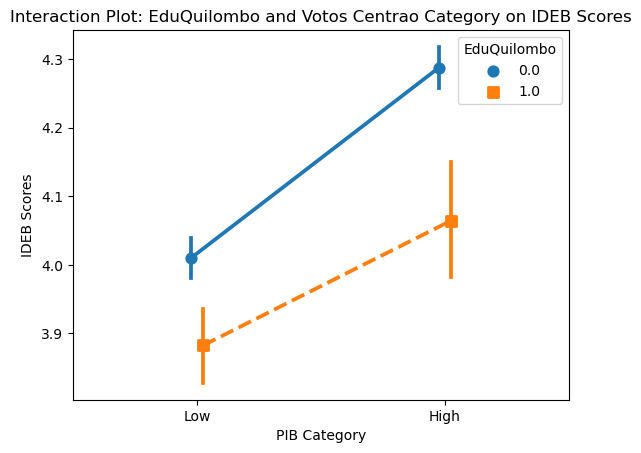

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


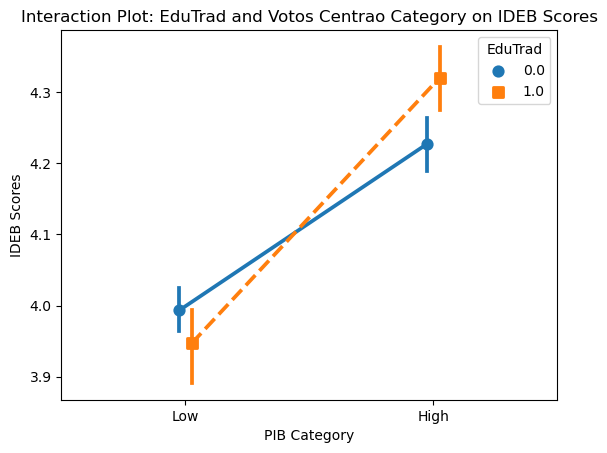

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


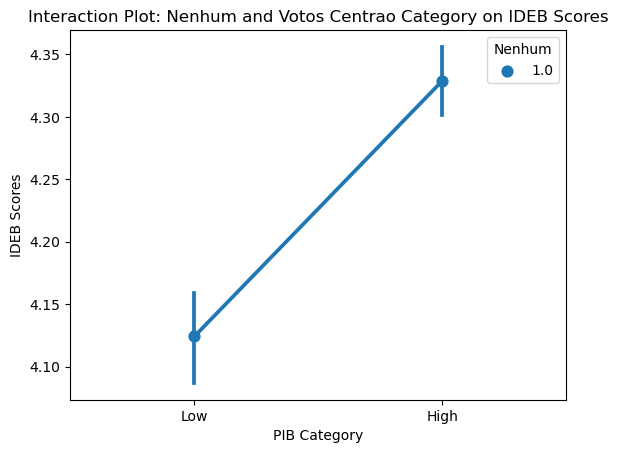

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


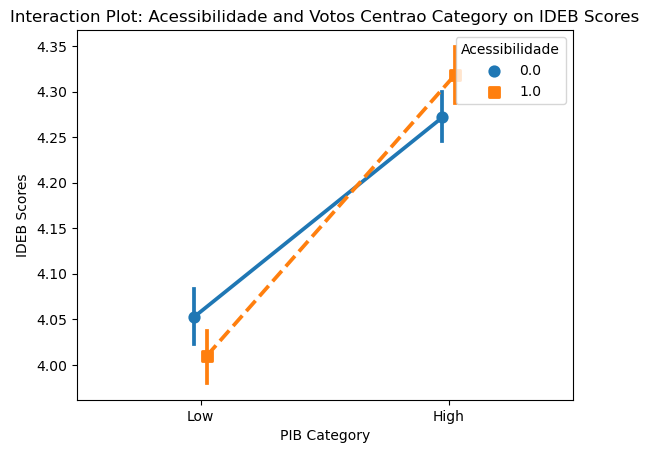

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


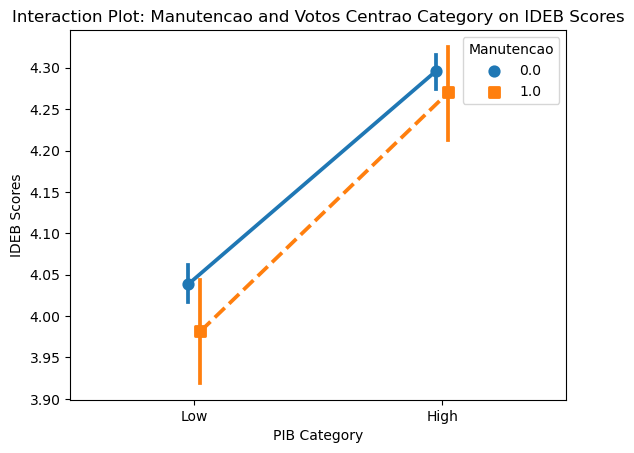

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


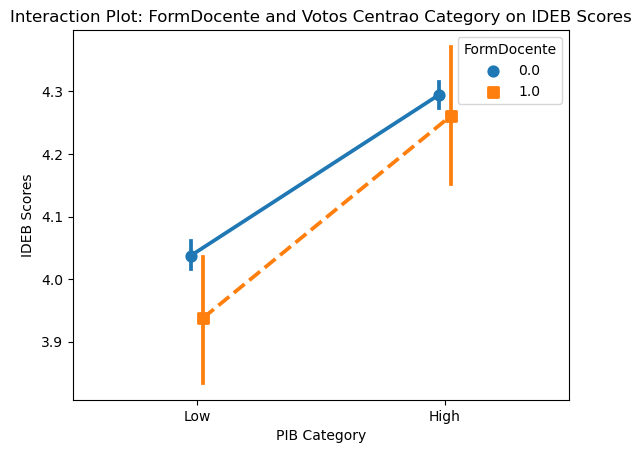

c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Programming\envs\Questions\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


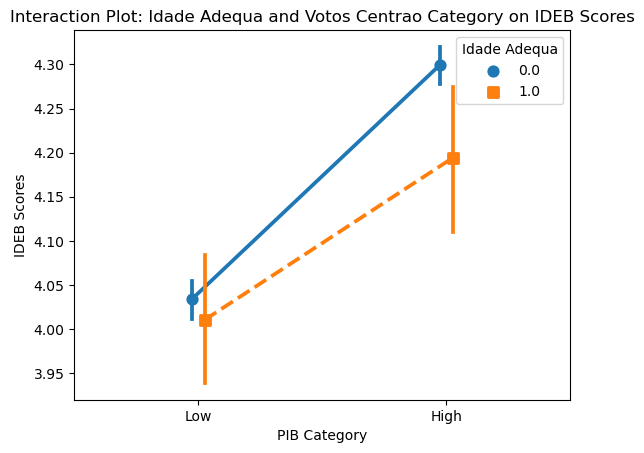

In [83]:
# merged_ideb_extra['pib_category'] = pd.qcut(merged_ideb_extra['VL_OBSERVADO_2023'], q=4, labels=['Low','Medium-Low', 'Medium-High', 'High'])

for i in merged_ideb_extra.iloc[:, -10:-1]:
# Create an interaction plot
    sns.pointplot(data=merged_ideb_extra, x='pib_category', y='VL_OBSERVADO_2023', hue=str(i), dodge=True, markers=['o', 's', 'D', '^'], linestyles=['-', '--', '-.', ':'])
    plt.title(f'Interaction Plot: {i} and Votos Centrao Category on IDEB Scores')
    plt.xlabel('PIB Category')
    plt.ylabel('IDEB Scores')
    plt.legend(title=i)
    plt.show()

In [86]:
# Select the last 10 columns
last_10_columns = merged_ideb_extra.columns[-10:]

# Group by 'pib_category' and 'votos_centrao_category' and calculate the mean for the last 10 columns
ideb_diff_analysis = merged_ideb_extra.groupby(['pib_category', 'votos_centrao_category'])[last_10_columns].mean()

# Display the result
print(ideb_diff_analysis)

                                     EduCampo  EduIndio  EduQuilombo  \
pib_category votos_centrao_category                                    
Low          Low                     0.853276  0.072650     0.179487   
             High                    0.842256  0.101338     0.241874   
High         Low                     0.746696  0.132159     0.113436   
             High                    0.762745  0.090196     0.117647   

                                      EduTrad  Nenhum  Acessibilidade  \
pib_category votos_centrao_category                                     
Low          Low                     0.266382     1.0        0.456443   
             High                    0.243786     1.0        0.498765   
High         Low                     0.383260     1.0        0.463009   
             High                    0.327451     1.0        0.483666   

                                     Manutencao  FormDocente  Idade Adequa  \
pib_category votos_centrao_category               

C:\Temp\ipykernel_22508\3805362602.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ideb_diff_analysis = merged_ideb_extra.groupby(['pib_category', 'votos_centrao_category'])[last_10_columns].mean()


In [60]:
from scipy.stats import spearmanr

def spearman_corr(group):
    # Check if there are at least two observations and variability in the data
    # Get correlation of 'ideb' with all other variables in the group
    correlations = {}
    numeric_cols = group.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col != 'VL_OBSERVADO_2023':
            corr, _ = spearmanr(group['VL_OBSERVADO_2023'], group[col], nan_policy='omit')
            correlations[col] = corr
    return correlations

spearman_results = {}
for group_name, group_data in merged_ideb_extra.groupby(['pib_category', 'votos_centrao_category']):
    correlations = spearman_corr(group_data)
    spearman_results[group_name] = correlations

# Convert results to a DataFrame for better visualization
spearman_df = pd.DataFrame(spearman_results).T


C:\Temp\ipykernel_22508\233334983.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_data in merged_ideb_extra.groupby(['pib_category', 'votos_centrao_category']):
C:\Temp\ipykernel_22508\233334983.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = spearmanr(group['VL_OBSERVADO_2023'], group[col], nan_policy='omit')


In [61]:
spearman_df[last_10_columns]

EduCampo  EduIndio  EduQuilombo   EduTrad  Nenhum  \
Low         Low  -0.073105 -0.018294     0.001199  0.053979     0.0   
            High -0.017929 -0.167946    -0.123474  0.016558     0.0   
Medium-Low  Low   0.000936  0.023799    -0.040974  0.037381     0.0   
            High  0.004215 -0.017374    -0.024730 -0.007737     0.0   
Medium-High Low   0.119634 -0.019161    -0.093318 -0.068656     0.0   
            High  0.045489 -0.051070     0.013940 -0.001608     0.0   
High        Low  -0.006870  0.055081    -0.047407  0.014195     0.0   
            High  0.105001 -0.086241    -0.000624 -0.050535     0.0   

                  Acessibilidade  Manutencao  FormDocente  Idade Adequa  \
Low         Low         0.020606    0.036529    -0.069380     -0.002723   
            High        0.093104    0.004707    -0.083698     -0.003823   
Medium-Low  Low        -0.013619    0.002478    -0.021763      0.071812   
            High       -0.056026    0.019054    -0.035053      0.063175   
Medium-High Low        -0.001571    0.019429     0.089192     -0.042884   
            High        0.091671   -0.050846    -0.005489     -0.006603   
High        Low         0.058188   -0.028293    -0.014174     -0.074402   
            High        0.073518   -0.045555     0.010293     -0.036709   

                  Alfabe Idade  
Low         Low       0.007051  
            High      0.026659  
Medium-Low  Low       0.061711  
            High     -0.018590  
Medium-High Low      -0.006472  
            High     -0.032951  
High        Low       0.087864  
            High      0.013907